대략적인 구조


1. 필요한 라이브러리 및 패키지 설치
2. 데이터셋 불러오기
3. 각 지역별로 모델링 및 사용한 모델의 성능 결과 확인

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


필요한 라이브러리 및 패키지를 설치해줍니다.

In [ ]:
!pip install tensorflow

In [ ]:
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 1.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform
from skopt import BayesSearchCV
from xgboost import XGBRegressor
from skopt.space import Integer, Real
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

-matplotlib로 그래프를 그릴 경우 글자가 깨지는 경우가 있기 때문에 필요한 라이브러리 및 패키지를 설치해줍니다.



In [ ]:
!wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
!unzip -o NotoSansCJKkr-hinted.zip
!mv NotoSansCJKkr* /usr/share/fonts/

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.fontManager.addfont(path='/usr/share/fonts/NotoSansCJKkr-Medium.otf')
prop = fm.FontProperties(fname='/usr/share/fonts/NotoSansCJKkr-Medium.otf')
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['font.weight'] = prop.get_weight()

--2023-08-25 19:10:09--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 172.253.63.207, 142.251.111.207, 142.251.16.207, ...
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|172.253.63.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip’

NotoSansCJKkr-hinte 100%[===================>] 115.55M   119MB/s    in 1.0s    

2023-08-25 19:10:11 (119 MB/s) - ‘NotoSansCJKkr-hinted.zip’ saved [121163981/121163981]

Archive:  NotoSansCJKkr-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKkr-Black.otf  
  inflating: NotoSansCJKkr-Bold.otf  
  inflating: NotoSansCJKkr-DemiLight.otf  
  inflating: NotoSansCJKkr-Light.otf  
  inflating: NotoSansCJKkr-Medium.otf  
  inflating: NotoSansCJKkr-Regular.otf  
  inflating: Noto

데이터 셋을 불러옵니다.

In [ ]:
total= pd.read_excel("/content/drive/MyDrive/Colab Notebooks/시차고려/통합 문서.xlsx")
total

,지역,날짜,실업률,고용률,어음부도율,지가변동률,상장회사수,비은행예금취급기관_금액,주택거래량,예금은행 기타 가계대출금,...,예금은행 주택담보 대출금,아파트매매가격지수,소비자물가지수,이혼율,교육비지출전망지수,부동산지수,부동산시장소비심리지수,가계대출 연체율,통화량,기준금리
0,강원도,2018.12,4.2,61.9,0.18,0.272,1,15843.1,1540,4166.3,...,5047.4,92.6,98.662,40.6,97,98.0,78.6,NaN,2700362,1.75
1,경기도,2018.12,4.0,62.5,0.29,0.363,4,105629.2,14559,42242.9,...,142138.3,101.5,98.863,-12.6,106,84.6,75.0,NaN,2700362,1.75
2,경상남도,2018.12,3.8,62.8,0.13,0.090,0,41458.0,3267,8724.2,...,19432.7,89.1,99.169,-18.4,99,98.1,73.6,NaN,2700362,1.75
3,경상북도,2018.12,3.9,62.3,0.14,0.211,2,34996.7,2424,5658.0,...,8244.3,90.4,99.580,6.9,104,97.8,76.1,NaN,2700362,1.75
4,광주광역시,2018.12,3.2,62.1,0.18,0.529,0,15866.8,2462,4406.5,...,9995.1,109.9,99.118,-4.5,100,94.5,82.2,NaN,2700362,1.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,전라남도,2023.05,3.1,67.7,0.01,0.004,0,33268.9,1875,3830.8,...,6148.0,106.9,111.740,-23.8,99,99.1,93.1,0.18,3777762,3.50
860,전라북도,2023.05,2.4,67.6,0.00,-0.013,0,35867.8,2462,4516.8,...,6606.7,109.5,111.120,20.8,95,101.4,99.3,1.30,3777762,3.50
861,제주도,2023.05,2.7,68.0,0.01,-0.014,0,17121.3,608,4946.4,...,3821.5,109.6,111.340,25.9,94,102.2,92.6,0.65,3777762,3.50
862,충청남도,2023.05,2.3,68.7,0.46,0.068,0,38521.9,3064,5378.3,...,11982.1,103.5,111.960,-30.8,98,99.7,95.2,0.19,3777762,3.50


데이터 타입, 개수 그리고 각 행별로 null 값 여부를 확인합니다. null값이 없는 것으로 확인됐습니다.

In [ ]:
total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지역             864 non-null    object 
 1   날짜             864 non-null    float64
 2   실업률            864 non-null    float64
 3   고용률            864 non-null    float64
 4   어음부도율          864 non-null    float64
 5   지가변동률          864 non-null    float64
 6   상장회사수          864 non-null    int64  
 7   비은행예금취급기관_금액   864 non-null    float64
 8   주택거래량          864 non-null    int64  
 9   예금은행 기타 가계대출금  864 non-null    float64
 10  월세수급동향         864 non-null    float64
 11  매매수급동향         864 non-null    float64
 12  전세수급동향         864 non-null    float64
 13  예금은행 주택담보 대출금  864 non-null    float64
 14  아파트매매가격지수      864 non-null    float64
 15  소비자물가지수        864 non-null    float64
 16  이혼율            864 non-null    float64
 17  교육비지출전망지수      864 non-null    int64  
 18  부동산지수     

#1) 지역별로 나누어 분석한 것이 의미가 있을까?

##전국을 기준으로 독립변수와 연체율과의 상관계수, 결정계수를 살펴봅시다.

In [ ]:
#독립변수와 연체율과의 상관계수
correlations =total.corr()['가계대출 연체율']
print(correlations)

In [ ]:
#독립변수와 종속변수인 가계대출 연체율을 회귀분석하여 결정계수를 확인해봅니다.
#본 셀은 전국 데이터를 회귀분석하는 셀입니다. 2019년 12월~2023년 5월까지의 데이터를 회귀분석해보았습니다
#각 독립변수들은 864개개의 데이터를 가지고 있지만 가계대출 연체율은 672개의 데이터를 갖고 있습니다.
#이는 데이터 수집 기간이 차이가 나기 때문입니다. 각 독립변수들은 2018년 12월부터 2023년 5월까지 수집됐지만 가계대출 연체율은 2019년 12월부터 2023년 5월까지 수집됐습니다.
#그래서 2019년 12월~2023년 5월까지의 데이터를 회귀분석해보았습니다.

x=total[['실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수', '통화량', '기준금리']]
#16개 지역*12개월=192개.
#위에서부터 192개 행을 잘라줍니다.
x=x.loc[192:]
#참고로 회귀분석을 하기 위해선 종속변수와 독립변수의 인덱스를 맞춰야 합니다.
x.index=np.array(range(len(x)))
y=total['가계대출 연체율']
#마찬가지로 위에서부터 192개 행을 잘라줍니다.
y=y.loc[192:]
#마찬가지로 종속변수와 독립변수의 인덱스를 맞춰야 합니다.
y.index=np.array(range(len(y)))
#회귀 분석을 해봅니다.
ols_model = sm.OLS(y,x)
result = ols_model.fit()
result.summary()

##임의로 한 지역을 선택하여 독립변수와 연체율과의 상관계수, 결정계수를 확인해봅시다.

##전라북도를 선택하여 상관계수와 결정계수를 확인해보았습니다.

In [ ]:
#독립변수와 종속변수인 가계대출 연체율을 회귀분석하여 결정계수를 확인해봅니다.
#본 셀은 전국 데이터를 회귀분석하는 셀입니다. 2019년 12월~2023년 5월까지의 데이터를 회귀분석해보았습니다
#각 독립변수들은 864개개의 데이터를 가지고 있지만 가계대출 연체율은 672개의 데이터를 갖고 있습니다.
#이는 데이터 수집 기간이 차이가 나기 때문입니다. 각 독립변수들은 2018년 12월부터 2023년 5월까지 수집됐지만 가계대출 연체율은 2019년 12월부터 2023년 5월까지 수집됐습니다.
#그래서 2019년 12월~2023년 5월까지의 데이터를 회귀분석해보았습니다.
jeonbuk = total[total['지역'] == '전라북도']
x=jeonbuk[['실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수', '통화량', '기준금리']]
x.index=np.array(range(len(x)))
x=x.loc[12:]
#회귀분석을 하기 위해선 종속변수와 독립변수의 인덱스를 맞춰야 합니다.
x.index=np.array(range(len(x)))
y=jeonbuk['가계대출 연체율']
y.index=np.array(range(len(y)))
y=y.loc[12:]
#마찬가지로 종속변수와 독립변수의 인덱스를 맞춰야 합니다.
y.index=np.array(range(len(y)))
ols_model = sm.OLS(y,x)
result = ols_model.fit()
result.summary()

#상관계수와 회귀계수가 다르므로 지역별로 나누어 분석하는 것이 의미있는 것을 확인할 수 있었습니다.

# 2) 이제 본격적으로 지역을 나누어 분석하고 모델링을 해봅시다.

#전라북도(코드 실행 결과 포함)

##연체율에 가장 영향을 많이 미치는 시기를 회귀분석의 결정계수를 이용하여 추출.

---



In [ ]:
jeonbuk.columns

Index(['지역', '날짜', '실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수',
       '가계대출 연체율', '통화량', '기준금리'],
      dtype='object')

전라북도 지역은 3개월 시차를 두고 회귀분석을 했을 때 결정계수가 가장 높은 것이 확인됨

In [ ]:
#shift 안의 숫자만 변경하여 회귀분석 돌린 결과 3개월 정도 시차를 뒀을 때 r-sqared 값이 가장 높은 것으로 확인됨.
reg=jeonbuk[['실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수', '통화량', '기준금리']].copy().shift(3)
y=jeonbuk['가계대출 연체율']
reg.index=np.array(range(len(reg)))
reg=reg.loc[12:]
reg.index=np.array(range(len(reg)))
y.index=np.array(range(len(y)))
y=y.loc[12:]
y.index=np.array(range(len(y)))
ols_model = sm.OLS(y,reg)
result = ols_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               가계대출 연체율   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              463.7
Date:                Fri, 25 Aug 2023   Prob (F-statistic):                    2.15e-24
Time:                        19:10:29   Log-Likelihood:                          95.942
No. Observations:                  42   AIC:                                     -151.9
Df Residuals:                      22   BIC:                                     -117.1
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
실업률              -0.0239      0.010     -2.442      0.023      -0.044      -0.004
고용률              -0.0038      0.004     -0.956      0.350      -0.012       0.004
어음부도율             0.1147      0.061      1.876      0.074      -0.012       0.242
지가변동률            -0.3696      0.350     -1.057      0.302      -1.094       0.355
상장회사수             0.0105      0.016      0.649      0.523      -0.023       0.044
비은행예금취급기관_금액   -3.09e-05   3.21e-05     -0.962      0.347   -9.75e-05    3.57e-05
주택거래량          1.105e-05   1.88e-05      0.589      0.562   -2.79e-05       5e-05
예금은행 기타 가계대출금   6.77e-05   8.45e-05      0.802      0.431      -0.000       0.000
월세수급동향            0.0036      0.002      1.605      0.123      -0.001       0.008
매매수급동향            0.0002      0.001      0.222      0.826      -0.001       0.002
전세수급동향            0.0035      0.003      1.213      0.238      -0.002       0.009
예금은행 주택담보 대출금  7.275e-05      0.000      0.693      0.496      -0.000       0.000
아파트매매가격지수        -0.0252      0.010     -2.567      0.018      -0.046      -0.005
소비자물가지수           0.0233      0.015      1.518      0.143      -0.009       0.055
이혼율              -0.0003      0.000     -0.676      0.506      -0.001       0.001
교육비지출전망지수         0.0043      0.003      1.263      0.220      -0.003       0.011
부동산지수            -0.0478      0.017     -2.830      0.010      -0.083      -0.013
부동산시장소비심리지수      -0.0001      0.001     -0.263      0.795      -0.001       0.001
통화량            1.369e-06   3.79e-07      3.613      0.002    5.83e-07    2.16e-06
기준금리              0.1656      0.039      4.201      0.000       0.084       0.247
==============================================================================
Omnibus:                        8.846   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                7.991
Skew:                           0.862   Prob(JB):                       0.0184
Kurtosis:                       4.263   Cond. No.                     2.26e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.26e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
reg=sm.add_constant(reg,has_constant='add')
reg

,const,실업률,고용률,어음부도율,지가변동률,상장회사수,비은행예금취급기관_금액,주택거래량,예금은행 기타 가계대출금,월세수급동향,...,전세수급동향,예금은행 주택담보 대출금,아파트매매가격지수,소비자물가지수,이혼율,교육비지출전망지수,부동산지수,부동산시장소비심리지수,통화량,기준금리
0,1.0,2.9,61.9,0.19,0.175,0.0,24587.6,2537.0,4793.8,86.84,...,83.65,6240.3,92.1,99.956,21.1,98.0,96.3,95.6,2853964.0,1.50
1,1.0,1.5,68.5,0.22,0.172,2.0,24723.8,2383.0,4845.9,87.31,...,83.74,6354.5,91.9,100.052,2.0,98.0,96.2,70.7,2871952.0,1.25
2,1.0,1.5,68.6,0.17,0.153,0.0,24816.9,2411.0,4896.0,86.56,...,84.12,6473.5,91.4,99.461,4.8,99.0,96.0,84.2,2917439.0,1.25
3,1.0,4.5,58.8,0.07,0.140,0.0,25172.0,3107.0,4907.0,79.79,...,95.30,6488.8,91.6,99.756,-0.5,101.0,96.0,130.8,2913610.0,1.25
4,1.0,3.9,60.4,0.08,0.187,0.0,25373.5,2791.0,4876.6,83.70,...,94.17,6518.9,91.8,100.310,12.8,105.0,96.0,113.0,2922453.0,1.25
5,1.0,4.3,55.9,0.08,0.199,0.0,25648.2,3186.0,4911.9,84.26,...,93.23,6474.6,93.2,100.370,-0.5,101.0,96.1,123.2,2977984.0,1.25
6,1.0,3.3,56.9,0.04,0.184,0.0,25971.6,3009.0,4952.0,87.59,...,90.41,6493.7,93.1,100.040,56.5,96.0,96.2,133.0,2986839.0,0.75
7,1.0,2.8,57.7,0.22,0.177,0.0,26337.9,2508.0,4969.1,86.30,...,89.66,6561.6,92.3,99.520,-4.5,91.0,96.3,80.1,3011431.0,0.75
8,1.0,3.1,57.6,0.12,0.186,0.0,26585.5,3307.0,4999.6,87.41,...,86.28,6530.0,93.1,99.320,-14.2,94.0,96.4,123.6,3065842.0,0.50
9,1.0,3.5,58.0,0.04,0.205,0.0,26947.6,3925.0,5069.4,90.74,...,86.47,6536.8,93.9,99.570,6.1,95.0,96.5,103.4,3083082.0,0.50


##시차 적용 완료

##랜덤포레스트 회귀 모델을 이용하여 연체율에 영향을 미치는 중요 변수 확인

Rank 1: Feature 지가변동률, Importance: 0.2044504016789791
Rank 2: Feature 기준금리, Importance: 0.148093760119623
Rank 3: Feature 주택거래량, Importance: 0.14684988735182872
Rank 4: Feature 예금은행 기타 가계대출금, Importance: 0.11801687568919565
Rank 5: Feature 소비자물가지수, Importance: 0.08908110852639395
Rank 6: Feature 비은행예금취급기관_금액, Importance: 0.07934699029380425
Rank 7: Feature 예금은행 주택담보 대출금, Importance: 0.06877453851626035
Rank 8: Feature 월세수급동향, Importance: 0.04578968665578844
Rank 9: Feature 통화량, Importance: 0.02836459953292243
Rank 10: Feature 부동산지수, Importance: 0.014033830362888893
Rank 11: Feature 전세수급동향, Importance: 0.01042818237049155
Rank 12: Feature 아파트매매가격지수, Importance: 0.009353544832513896
Rank 13: Feature 어음부도율, Importance: 0.007607504265182071
Rank 14: Feature 실업률, Importance: 0.006630182388986729
Rank 15: Feature 고용률 , Importance: 0.0054401617266898565
Rank 16: Feature 이혼율, Importance: 0.004583382857963373
Rank 17: Feature 부동산시장소비심리지수, Importance: 0.004253089872572114
Rank 18: Feature 교육비지출전

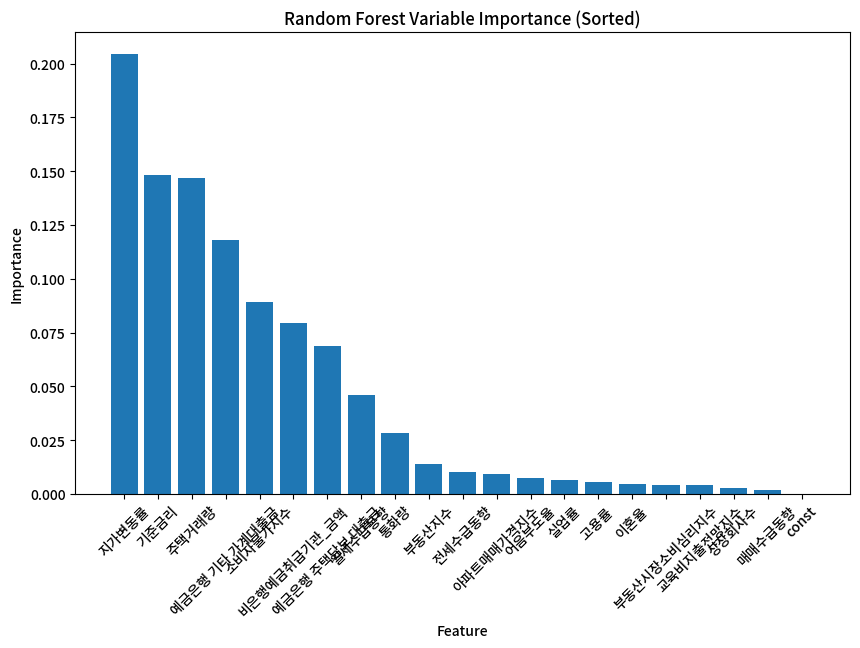

R-squared (R²): 0.9587052818196146


In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(reg, y, test_size=0.3, random_state=42)

rf_model.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_model.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#
y_pred = rf_model.predict(X_test)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

##상위 7개 변수 추출한 뒤 다중공선성 제거

In [ ]:
scaler = StandardScaler()

z_score_normalized = scaler.fit_transform(reg[['지가변동률', '기준금리','주택거래량','소비자물가지수','예금은행 기타 가계대출금','비은행예금취급기관_금액','예금은행 주택담보 대출금']])
normalized_data = pd.DataFrame(z_score_normalized, columns=['지가변동률', '기준금리','주택거래량','소비자물가지수','예금은행 기타 가계대출금','비은행예금취급기관_금액','예금은행 주택담보 대출금'])
normalized_data = sm.add_constant(normalized_data,has_constant='add')

In [ ]:
normalized_data

,const,지가변동률,기준금리,주택거래량,소비자물가지수,예금은행 기타 가계대출금,비은행예금취급기관_금액,예금은행 주택담보 대출금
0,1.0,-0.116859,0.245248,-0.352160,-0.938597,-1.329906,-1.525915,-3.158294
1,1.0,-0.169258,-0.025816,-0.535231,-0.913352,-1.147742,-1.489198,-2.258165
2,1.0,-0.501119,-0.025816,-0.501945,-1.068761,-0.972572,-1.464100,-1.320203
3,1.0,-0.728183,-0.025816,0.325441,-0.991188,-0.934111,-1.368371,-1.199608
4,1.0,0.092738,-0.025816,-0.050211,-0.845509,-1.040402,-1.314051,-0.962359
5,1.0,0.302335,-0.025816,0.419354,-0.829731,-0.916978,-1.239997,-1.311533
6,1.0,0.040339,-0.567943,0.208941,-0.916508,-0.776772,-1.152814,-1.160986
7,1.0,-0.081926,-0.567943,-0.386634,-1.053247,-0.716983,-1.054066,-0.625796
8,1.0,0.075272,-0.839007,0.563195,-1.105839,-0.610342,-0.987318,-0.874868
9,1.0,0.407134,-0.839007,1.297857,-1.040099,-0.366292,-0.889702,-0.821270


In [ ]:
vif=pd.DataFrame() #vif라는 빈 데이터프레임 형성
vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]
#vif에 "VIF Factor"라는 변수에 x_data의 값들의 분산팽창요인을 넣고 범위는 (x_data.shape[1])

vif["features"] = normalized_data.columns #"features"라는 변수에 x_data의 열변수들 입력
vif

,VIF Factor,features
0,1.000000,const
1,4.397193,지가변동률
2,31.219826,기준금리
3,3.853918,주택거래량
4,68.835094,소비자물가지수
5,9.317030,예금은행 기타 가계대출금
6,49.480823,비은행예금취급기관_금액
7,3.811916,예금은행 주택담보 대출금


In [ ]:
vif=pd.DataFrame()

normalized_data=normalized_data.drop('소비자물가지수', axis=1)

vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]

vif["features"] = normalized_data.columns
vif

,VIF Factor,features
0,1.000000,const
1,3.727700,지가변동률
2,22.137590,기준금리
3,3.853211,주택거래량
4,9.177675,예금은행 기타 가계대출금
5,10.192452,비은행예금취급기관_금액
6,3.746812,예금은행 주택담보 대출금


In [ ]:
vif=pd.DataFrame()

normalized_data=normalized_data.drop('기준금리', axis=1)

vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]

vif["features"] = normalized_data.columns
vif


,VIF Factor,features
0,1.000000,const
1,3.288883,지가변동률
2,3.464302,주택거래량
3,3.852847,예금은행 기타 가계대출금
4,3.997971,비은행예금취급기관_금액
5,3.743594,예금은행 주택담보 대출금


In [ ]:
#회귀 계수 추출
y.index=np.array(range(len(y)))
#ols에 들어갈 변수들의 인덱스를 맞춰야 에러가 안 일어남
ols_model = sm.OLS(y,normalized_data)
result = ols_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               가계대출 연체율   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     85.69
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           5.78e-19
Time:                        01:07:09   Log-Likelihood:                 60.617
No. Observations:                  42   AIC:                            -109.2
Df Residuals:                      36   BIC:                            -98.81
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4631      0.010     48.625      0.000       0.444       0.482
지가변동률            -0.1351      0.017     -7.825      0.000      -0.170      -0.100
주택거래량             0.0333      0.018      1.880      0.068      -0.003       0.069
예금은행 기타 가계대출금    -0.0399      0.019     -2.137      0.039      -0.078      -0.002
비은행예금취급기관_금액      0.0725      0.019      3.808      0.001       0.034       0.111
예금은행 주택담보 대출금     0.0455      0.018      2.469      0.018       0.008       0.083
==============================================================================
Omnibus:                        1.843   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.398   Jarque-Bera (JB):                0.996
Skew:                           0.333   Prob(JB):                        0.608
Kurtosis:                       3.356   Cond. No.                         5.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##시차 적용 및 다중 공선성 제거 완료
전라북도 지역은 3개월 시차를 뒀을 때 연체율에 영향을 많이 줌

##모델링

###선형회귀모델 성능평가

Mean Squared Error (MSE): 0.003049993718564204
Root Mean Squared Error (RMSE): 0.055226748216459426
Mean Absolute Error (MAE): 0.05081756107774738
R-squared (R2): 0.8646191788524057


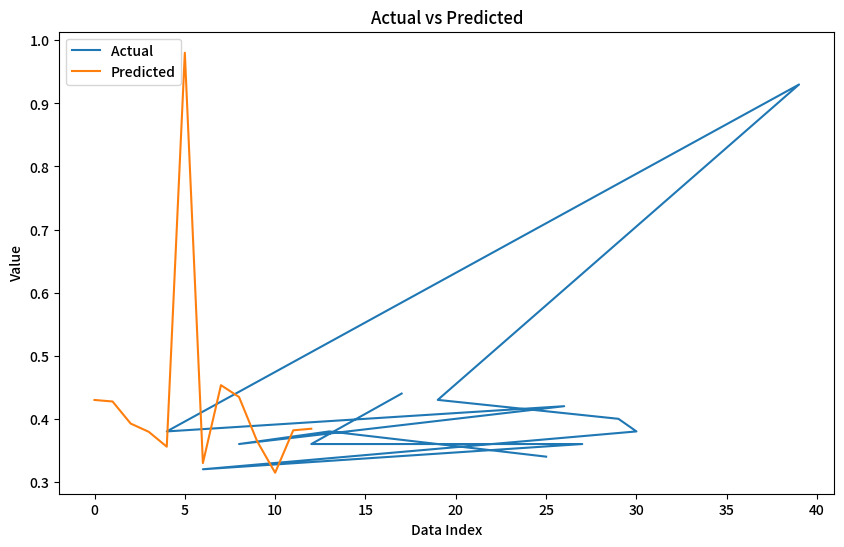

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3,random_state=42)
# Linear Regression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (Coefficient of Determination) 계산
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# 예측 결과 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Data Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###lstm 모델 및 성능 평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Reshape input data for LSTM
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

# Define a function to create a Keras LSTM model
def create_lstm_model(units, activation):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation=activation))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

# Perform manual grid search
best_model = None
best_score = float('inf')

for params in ParameterGrid(param_grid):
    model = create_lstm_model(**params)
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=1, verbose=0)

    X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    y_pred = model.predict(X_test_reshaped)

    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_model = model
        best_params = params

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)

1/1 [==============================] - 0s 430ms/step


1/1 [==============================] - 0s 438ms/step


1/1 [==============================] - 0s 450ms/step
Best Parameters: {'activation': 'relu', 'units': 32}
Best Mean Squared Error: 0.001065664495621625


lstm 최적의 파라미터 추출

In [ ]:
time_steps=1
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(LSTM(64, input_shape=(time_steps,X_train.shape[1]), activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())
x=np.array(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
model.fit(x,y_train,epochs=100,batch_size=1)
# 예측 값 계산
x1=np.array(X_test).reshape(X_test.shape[0],1,X_test.shape[1])
y_pred = model.predict(x1)
#평균 제곱 오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# 평균 절대 오차(MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
#결정 계수(R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print("예측값: ",y_pred)
print("실제값: ",y_test)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 64)                18176     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 18,241
Trainable params: 18,241
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
29/29 [==============================] - 4s 5ms/step - loss: 0.2312
Epoch 2/100
29/29 [==============================] - 0s 6ms/step - loss: 0.1235
Epoch 3/100
29/29 [==============================] - 0s 6ms/step - loss: 0.0436
Epoch 4/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0141
Epoch 5/100
29/29 [==============================] - 0s 5ms/step - loss: 0.0067
Epoch 6/100
29/29 [======================

###ridge 회귀모델 및 평가

In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Ridge 회귀 모델 생성
alpha = 1.0  # alpha 값은 규제의 강도를 조절하는 하이퍼파라미터
ridge_model = Ridge(alpha=alpha)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

Mean Squared Error: 0.0028569307709808704
R-squared (R²): 0.8731887113789549


###랜덤포레스트 회귀 모델 및 평가

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mean Squared Error (MSE): 0.0018685907692307638
RMSE: 0.043227199414613525
Mean Absolute Error (MAE): 0.03258461538461535
R-squared (R²): 0.9170584020591482
Train CV MSE: 0.01208058213333332
Test CV MSE: 0.022289192
과적합 아닙니다
Rank 1: Feature 비은행예금취급기관_금액, Importance: 0.31903466722045276
Rank 2: Feature 예금은행 주택담보 대출금, Importance: 0.2029605128854524
Rank 3: Feature 지가변동률, Importance: 0.18732498059658947
Rank 4: Feature 주택거래량, Importance: 0.1459103362383612
Rank 5: Feature 예금은행 기타 가계대출금, Importance: 0.14476950305914424
Rank 6: Feature const, Importance: 0.0


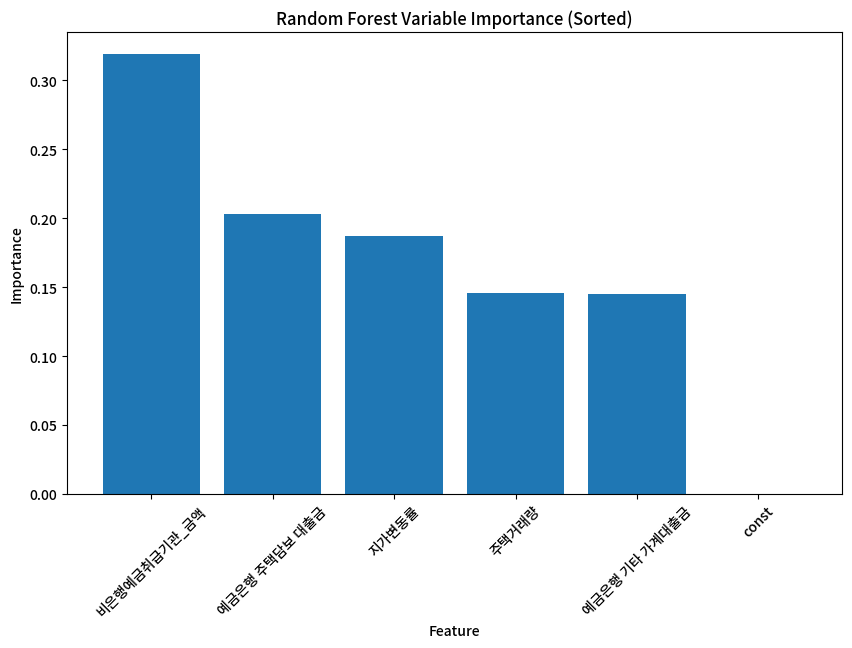

In [ ]:

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(random_state=42)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20,30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)


# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_rf_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_rf_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

###xg 부스트 회귀 모델 및 평가

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}
Mean Squared Error (MSE): 0.0039039075416568213
RMSE: 0.06248125752301102
Mean Absolute Error (MAE): 0.040191912284264206
R-squared (R²): 0.8267162960182795
Train CV MSE: 0.01314598931427934
Test CV MSE: 0.02025456188351602
과적합 아닙니다
Rank 1: Feature 비은행예금취급기관_금액, Importance: 0.499472439289093
Rank 2: Feature 지가변동률, Importance: 0.24382704496383667
Rank 3: Feature 주택거래량, Importance: 0.19857999682426453
Rank 4: Feature 예금은행 기타 가계대출금, Importance: 0.055112604051828384
Rank 5: Feature 예금은행 주택담보 대출금, Importance: 0.0030079020652920008
Rank 6: Feature const, Importance: 0.0


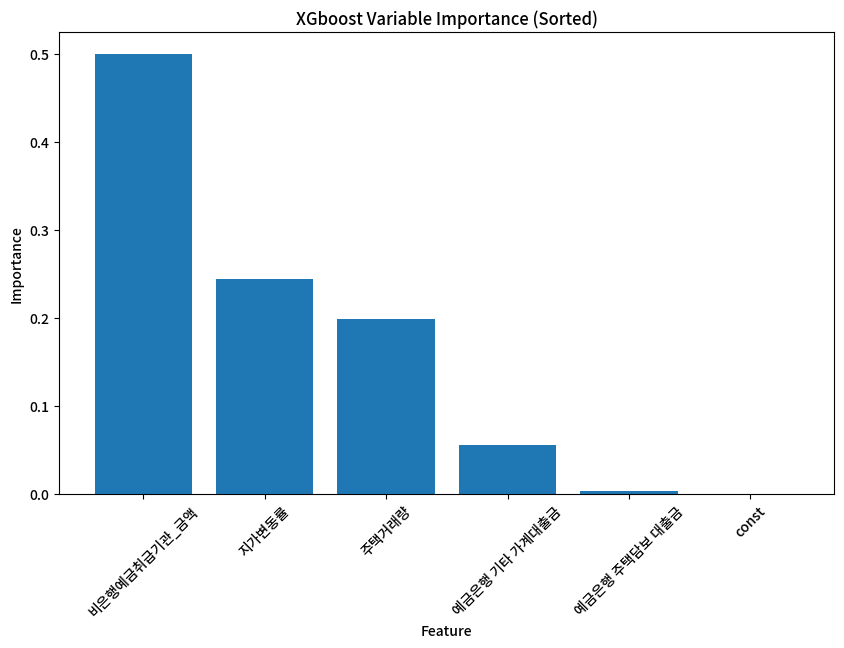

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# xgboost 회귀 모델 생성
xgb_regressor = XGBRegressor(n_estimators=1000)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_xgb_regressor = grid_search.best_estimator_
y_pred = best_xgb_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_xgb_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_xgb_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGboost Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#강원도

##연체율에 가장 영향을 많이 미치는 시기를 회귀분석의 결정계수를 이용하여 추출.

---



In [ ]:
gangwon = total[total['지역'] == '강원도']
partial=total.columns.drop(['날짜', '지역'])

In [ ]:
gangwon.columns

강원도 지역은 12개월 시차를 두고 회귀분석을 했을 때 결정계수가 가장 높은 것이 확인됨

In [ ]:
reg=gangwon[['실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수', '통화량', '기준금리']].copy().shift(12)
y=gangwon['가계대출 연체율']
reg.index=np.array(range(len(reg)))
reg=reg.loc[12:]
reg.index=np.array(range(len(reg)))
y.index=np.array(range(len(y)))
y=y.loc[12:]
y.index=np.array(range(len(y)))
ols_model = sm.OLS(y,reg)
result = ols_model.fit()
result.summary()

In [ ]:
reg=sm.add_constant(reg,has_constant='add')
reg

##랜덤포레스트 회귀 모델을 이용하여 중요 변수 확인

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(reg, y, test_size=0.3, random_state=42)

rf_model.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_model.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#
y_pred = rf_model.predict(X_test)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

##상위 7개 변수 추출한 뒤 다중공선성 제거

In [ ]:
scaler = StandardScaler()

z_score_normalized = scaler.fit_transform(reg[['지가변동률', '전세수급동향', '예금은행 주택담보 대출금', '아파트매매가격지수', '소비자물가지수',
       '부동산지수', '통화량']])
normalized_data = pd.DataFrame(z_score_normalized, columns=['지가변동률', '전세수급동향', '예금은행 주택담보 대출금', '아파트매매가격지수', '소비자물가지수',
       '부동산지수', '통화량'])
normalized_data = sm.add_constant(normalized_data,has_constant='add')

In [ ]:
normalized_data

In [ ]:
vif=pd.DataFrame() #vif라는 빈 데이터프레임 형성
vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]
#vif에 "VIF Factor"라는 변수에 x_data의 값들의 분산팽창요인을 넣고 범위는 (x_data.shape[1])

vif["features"] = normalized_data.columns #"features"라는 변수에 x_data의 열변수들 입력
vif

In [ ]:
vif=pd.DataFrame()

normalized_data=normalized_data.drop(['소비자물가지수','아파트매매가격지수','부동산지수','통화량'], axis=1)

vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]

vif["features"] = normalized_data.columns
vif

,VIF Factor,features
0,1.000000,const
1,1.434804,지가변동률
2,2.408388,전세수급동향
3,2.081627,예금은행 주택담보 대출금


In [ ]:
#회귀 계수 추출
y.index=np.array(range(len(y)))
#ols에 들어갈 변수들의 인덱스를 맞춰야 에러가 안 일어남
ols_model = sm.OLS(y,normalized_data)
result = ols_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               가계대출 연체율   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     13.72
Date:                Fri, 25 Aug 2023   Prob (F-statistic):           3.25e-06
Time:                        01:56:44   Log-Likelihood:                 112.12
No. Observations:                  42   AIC:                            -216.2
Df Residuals:                      38   BIC:                            -209.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1262      0.003     46.400      0.000       0.121       0.132
지가변동률            -0.0027      0.003     -0.819      0.418      -0.009       0.004
전세수급동향            0.0214      0.004      5.061      0.000       0.013       0.030
예금은행 주택담보 대출금    -0.0052      0.004     -1.318      0.195      -0.013       0.003
==============================================================================
Omnibus:                        0.062   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.969   Jarque-Bera (JB):                0.128
Skew:                          -0.078   Prob(JB):                        0.938
Kurtosis:                       2.780   Cond. No.                         2.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##시차 적용 및 다중공선성 제거 완료
강원도 지역은 12개월 시차를 뒀을 때 연체율에 영향을 많이 줌

In [ ]:
normalized_data=normalized_data.drop('const', axis=1)

##모델링

###선형회귀모델 성능평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3,random_state=42)
# Linear Regression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (Coefficient of Determination) 계산
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# 예측 결과 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Data Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###lstm 모델 및 성능 평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Reshape input data for LSTM
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

# Define a function to create a Keras LSTM model
def create_lstm_model(units, activation):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation=activation))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

# Perform manual grid search
best_model = None
best_score = float('inf')

for params in ParameterGrid(param_grid):
    model = create_lstm_model(**params)
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=1, verbose=0)

    X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    y_pred = model.predict(X_test_reshaped)

    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_model = model
        best_params = params

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)

lstm 최적의 파라미터 추출

In [ ]:
time_steps=1
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(LSTM(128, input_shape=(time_steps,X_train.shape[1]), activation='tanh'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())
x=np.array(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
model.fit(x,y_train,epochs=100,batch_size=1)
# 예측 값 계산
x1=np.array(X_test).reshape(X_test.shape[0],1,X_test.shape[1])
y_pred = model.predict(x1)
#평균 제곱 오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# 평균 절대 오차(MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
#결정 계수(R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print("예측값: ",y_pred)
print("실제값: ",y_test)

###ridge 회귀모델 및 평가

In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Ridge 회귀 모델 생성
alpha = 1.0  # alpha 값은 규제의 강도를 조절하는 하이퍼파라미터
ridge_model = Ridge(alpha=alpha)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

Mean Squared Error: 0.00027278014514240344
R-squared (R²): 0.17383791166548068


###랜덤포레스트 회귀 모델 및 평가

In [ ]:

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(random_state=42)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20,30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)


# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_rf_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_rf_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

###xg 부스트 회귀 모델 및 평가

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# xgboost 회귀 모델 생성
xgb_regressor = XGBRegressor(n_estimators=1000)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_xgb_regressor = grid_search.best_estimator_
y_pred = best_xgb_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_xgb_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_xgb_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGboost Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#경기도

##연체율에 가장 영향을 많이 미치는 시기를 회귀분석의 결정계수를 이용하여 추출.

---



In [ ]:
gyeonggi = total[total['지역'] == '경기도']
partial=total.columns.drop(['날짜', '지역'])

In [ ]:
gyeonggi.columns

경기도 지역은 3개월 시차를 두고 회귀분석을 했을 때 결정계수가 가장 높은 것이 확인됨

In [ ]:
reg=gyeonggi[['실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수', '통화량', '기준금리']].copy().shift(3)
y=gyeonggi['가계대출 연체율']
reg.index=np.array(range(len(reg)))
reg=reg.loc[12:]
reg.index=np.array(range(len(reg)))
y.index=np.array(range(len(y)))
y=y.loc[12:]
y.index=np.array(range(len(y)))
ols_model = sm.OLS(y,reg)
result = ols_model.fit()
result.summary()

In [ ]:
reg=sm.add_constant(reg,has_constant='add')
reg

##랜덤포레스트 회귀 모델을 이용하여 중요 변수 확인

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(reg, y, test_size=0.3, random_state=42)

rf_model.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_model.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#
y_pred = rf_model.predict(X_test)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

##상위 7개 변수 추출한 뒤 다중공선성 제거

In [ ]:
scaler = StandardScaler()

z_score_normalized = scaler.fit_transform(reg[['예금은행 기타 가계대출금', '지가변동률', '교육비지출전망지수','이혼율','아파트매매가격지수','매매수급동향','실업률']])
normalized_data = pd.DataFrame(z_score_normalized, columns=['예금은행 기타 가계대출금', '지가변동률', '교육비지출전망지수','이혼율','아파트매매가격지수','매매수급동향','실업률'])
normalized_data = sm.add_constant(normalized_data,has_constant='add')

In [ ]:
normalized_data

In [ ]:
vif=pd.DataFrame() #vif라는 빈 데이터프레임 형성
vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]
#vif에 "VIF Factor"라는 변수에 x_data의 값들의 분산팽창요인을 넣고 범위는 (x_data.shape[1])

vif["features"] = normalized_data.columns #"features"라는 변수에 x_data의 열변수들 입력
vif

In [ ]:
vif=pd.DataFrame()

normalized_data=normalized_data.drop(['소비자물가지수'], axis=1)

vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]

vif["features"] = normalized_data.columns
vif

In [ ]:
#회귀 계수 추출
y.index=np.array(range(len(y)))
#ols에 들어갈 변수들의 인덱스를 맞춰야 에러가 안 일어남
ols_model = sm.OLS(y,normalized_data)
result = ols_model.fit()
result.summary()

##시차 적용 및 다중공선성 제거 완료
경기도 지역은 3개월 시차를 뒀을 때 연체율에 영향을 많이 줌

In [ ]:
normalized_data=normalized_data.drop('const', axis=1)

##모델링

###선형회귀모델 성능평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3,random_state=42)
# Linear Regression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (Coefficient of Determination) 계산
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# 예측 결과 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Data Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###lstm 모델 및 성능 평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Reshape input data for LSTM
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

# Define a function to create a Keras LSTM model
def create_lstm_model(units, activation):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation=activation))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

# Perform manual grid search
best_model = None
best_score = float('inf')

for params in ParameterGrid(param_grid):
    model = create_lstm_model(**params)
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=1, verbose=0)

    X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    y_pred = model.predict(X_test_reshaped)

    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_model = model
        best_params = params

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)

lstm 최적의 파라미터 추출

In [ ]:
time_steps=1
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(LSTM(64, input_shape=(time_steps,X_train.shape[1]), activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())
x=np.array(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
model.fit(x,y_train,epochs=100,batch_size=1)
# 예측 값 계산
x1=np.array(X_test).reshape(X_test.shape[0],1,X_test.shape[1])
y_pred = model.predict(x1)
#평균 제곱 오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# 평균 절대 오차(MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
#결정 계수(R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print("예측값: ",y_pred)
print("실제값: ",y_test)

###ridge 회귀모델 및 평가

In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Ridge 회귀 모델 생성
alpha = 1.0  # alpha 값은 규제의 강도를 조절하는 하이퍼파라미터
ridge_model = Ridge(alpha=alpha)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

###랜덤포레스트 회귀 모델 및 평가

In [ ]:

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(random_state=42)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20,30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)


# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_rf_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_rf_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

###xg 부스트 회귀 모델 및 평가

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# xgboost 회귀 모델 생성
xgb_regressor = XGBRegressor(n_estimators=1000)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_xgb_regressor = grid_search.best_estimator_
y_pred = best_xgb_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_xgb_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_xgb_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGboost Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#경상남도

##연체율에 가장 영향을 많이 미치는 시기를 회귀분석의 결정계수를 이용하여 추출.

---



In [ ]:
gyeongnam = total[total['지역'] == '경상남도']
partial=total.columns.drop(['날짜', '지역'])

In [ ]:
gyeongnam.columns

경상남도 지역은 3개월 시차를 두고 회귀분석을 했을 때 결정계수가 가장 높은 것이 확인됨

In [ ]:
reg=gyeongnam[['실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수', '통화량', '기준금리']].copy().shift(3)
y=gyeongnam['가계대출 연체율']
reg.index=np.array(range(len(reg)))
reg=reg.loc[12:]
reg.index=np.array(range(len(reg)))
y.index=np.array(range(len(y)))
y=y.loc[12:]
y.index=np.array(range(len(y)))
ols_model = sm.OLS(y,reg)
result = ols_model.fit()
result.summary()

In [ ]:
reg=sm.add_constant(reg,has_constant='add')
reg

##랜덤포레스트 회귀 모델을 이용하여 중요 변수 확인

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(reg, y, test_size=0.3, random_state=42)

rf_model.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_model.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#
y_pred = rf_model.predict(X_test)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

##상위 7개 변수 추출한 뒤 다중공선성 제거

In [ ]:
scaler = StandardScaler()

z_score_normalized = scaler.fit_transform(reg[['지가변동률','예금은행 기타 가계대출금','월세수급동향','통화량','매매수급동향','비은행예금취급기관_금액','부동산시장소비심리지수']])
normalized_data = pd.DataFrame(z_score_normalized, columns=['지가변동률','예금은행 기타 가계대출금','월세수급동향','통화량','매매수급동향','비은행예금취급기관_금액','부동산시장소비심리지수'])
normalized_data = sm.add_constant(normalized_data,has_constant='add')

In [ ]:
normalized_data

In [ ]:
vif=pd.DataFrame() #vif라는 빈 데이터프레임 형성
vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]
#vif에 "VIF Factor"라는 변수에 x_data의 값들의 분산팽창요인을 넣고 범위는 (x_data.shape[1])

vif["features"] = normalized_data.columns #"features"라는 변수에 x_data의 열변수들 입력
vif

In [ ]:
vif=pd.DataFrame()

normalized_data=normalized_data.drop(['통화량'], axis=1)

vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]

vif["features"] = normalized_data.columns
vif

In [ ]:
#회귀 계수 추출
y.index=np.array(range(len(y)))
#ols에 들어갈 변수들의 인덱스를 맞춰야 에러가 안 일어남
ols_model = sm.OLS(y,normalized_data)
result = ols_model.fit()
result.summary()

##시차 적용 및 다중공선성 제거 완료
경상남도 지역은 3개월 시차를 뒀을 때 연체율에 영향을 많이 줌

In [ ]:
normalized_data=normalized_data.drop('const', axis=1)

##모델링

###선형회귀모델 성능평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3,random_state=42)
# Linear Regression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (Coefficient of Determination) 계산
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# 예측 결과 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Data Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###lstm 모델 및 성능 평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Reshape input data for LSTM
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

# Define a function to create a Keras LSTM model
def create_lstm_model(units, activation):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation=activation))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

# Perform manual grid search
best_model = None
best_score = float('inf')

for params in ParameterGrid(param_grid):
    model = create_lstm_model(**params)
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=1, verbose=0)

    X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    y_pred = model.predict(X_test_reshaped)

    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_model = model
        best_params = params

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)

lstm 최적의 파라미터 추출

In [ ]:
time_steps=1
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(LSTM(128, input_shape=(time_steps,X_train.shape[1]), activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())
x=np.array(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
model.fit(x,y_train,epochs=100,batch_size=1)
# 예측 값 계산
x1=np.array(X_test).reshape(X_test.shape[0],1,X_test.shape[1])
y_pred = model.predict(x1)
#평균 제곱 오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# 평균 절대 오차(MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
#결정 계수(R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print("예측값: ",y_pred)
print("실제값: ",y_test)

###ridge 회귀모델 및 평가

In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Ridge 회귀 모델 생성
alpha = 1.0  # alpha 값은 규제의 강도를 조절하는 하이퍼파라미터
ridge_model = Ridge(alpha=alpha)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

###랜덤포레스트 회귀 모델 및 평가

In [ ]:

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(random_state=42)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20,30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)


# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_rf_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_rf_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

###xg 부스트 회귀 모델 및 평가

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# xgboost 회귀 모델 생성
xgb_regressor = XGBRegressor(n_estimators=1000)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_xgb_regressor = grid_search.best_estimator_
y_pred = best_xgb_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_xgb_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_xgb_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGboost Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#경상북도

##연체율에 가장 영향을 많이 미치는 시기를 회귀분석의 결정계수를 이용하여 추출.

---



In [ ]:
gyeongbuk = total[total['지역'] == '경상북도']
partial=total.columns.drop(['날짜', '지역'])

In [ ]:
gyeongbuk.columns

경상북도 지역은 6개월 시차를 두고 회귀분석을 했을 때 결정계수가 가장 높은 것이 확인됨

In [ ]:
reg=gyeongbuk[['실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수', '통화량', '기준금리']].copy().shift(6)
y=gyeongbuk['가계대출 연체율']
reg.index=np.array(range(len(reg)))
reg=reg.loc[12:]
reg.index=np.array(range(len(reg)))
y.index=np.array(range(len(y)))
y=y.loc[12:]
y.index=np.array(range(len(y)))
ols_model = sm.OLS(y,reg)
result = ols_model.fit()
result.summary()

In [ ]:
reg=sm.add_constant(reg,has_constant='add')
reg

##랜덤포레스트 회귀 모델을 이용하여 중요 변수 확인

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(reg, y, test_size=0.3, random_state=42)

rf_model.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_model.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#
y_pred = rf_model.predict(X_test)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

##상위 7개 변수 추출한 뒤 다중공선성 제거

In [ ]:
scaler = StandardScaler()

z_score_normalized = scaler.fit_transform(reg['기준금리','예금은행 기타 가계대출금','주택거래량','월세수급동향','통화량','소비자물가지수','매매수급동향']])
normalized_data = pd.DataFrame(z_score_normalized, columns=['기준금리','예금은행 기타 가계대출금','주택거래량','월세수급동향','통화량','소비자물가지수','매매수급동향'])
normalized_data = sm.add_constant(normalized_data,has_constant='add')

In [ ]:
normalized_data

In [ ]:
vif=pd.DataFrame() #vif라는 빈 데이터프레임 형성
vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]
#vif에 "VIF Factor"라는 변수에 x_data의 값들의 분산팽창요인을 넣고 범위는 (x_data.shape[1])

vif["features"] = normalized_data.columns #"features"라는 변수에 x_data의 열변수들 입력
vif

In [ ]:
vif=pd.DataFrame()

normalized_data=normalized_data.drop(['통화량','소비자물가지수','월세수급동향'], axis=1)

vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]

vif["features"] = normalized_data.columns
vif

In [ ]:
#회귀 계수 추출
y.index=np.array(range(len(y)))
#ols에 들어갈 변수들의 인덱스를 맞춰야 에러가 안 일어남
ols_model = sm.OLS(y,normalized_data)
result = ols_model.fit()
result.summary()

##시차 적용 및 다중공선성 제거 완료
경상북도 지역은 6개월 시차를 뒀을 때 연체율에 영향을 많이 줌

In [ ]:
normalized_data=normalized_data.drop('const', axis=1)

##모델링

###선형회귀모델 성능평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3,random_state=42)
# Linear Regression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (Coefficient of Determination) 계산
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# 예측 결과 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Data Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###lstm 모델 및 성능 평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Reshape input data for LSTM
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

# Define a function to create a Keras LSTM model
def create_lstm_model(units, activation):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation=activation))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

# Perform manual grid search
best_model = None
best_score = float('inf')

for params in ParameterGrid(param_grid):
    model = create_lstm_model(**params)
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=1, verbose=0)

    X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    y_pred = model.predict(X_test_reshaped)

    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_model = model
        best_params = params

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)

lstm 최적의 파라미터 추출

In [ ]:
time_steps=1
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(LSTM(32, input_shape=(time_steps,X_train.shape[1]), activation='tanh'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())
x=np.array(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
model.fit(x,y_train,epochs=100,batch_size=1)
# 예측 값 계산
x1=np.array(X_test).reshape(X_test.shape[0],1,X_test.shape[1])
y_pred = model.predict(x1)
#평균 제곱 오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# 평균 절대 오차(MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
#결정 계수(R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print("예측값: ",y_pred)
print("실제값: ",y_test)

###ridge 회귀모델 및 평가

In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Ridge 회귀 모델 생성
alpha = 1.0  # alpha 값은 규제의 강도를 조절하는 하이퍼파라미터
ridge_model = Ridge(alpha=alpha)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

###랜덤포레스트 회귀 모델 및 평가

In [ ]:

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(random_state=42)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20,30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)


# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_rf_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_rf_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

###xg 부스트 회귀 모델 및 평가

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# xgboost 회귀 모델 생성
xgb_regressor = XGBRegressor(n_estimators=1000)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_xgb_regressor = grid_search.best_estimator_
y_pred = best_xgb_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_xgb_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_xgb_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGboost Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#광주광역시

##연체율에 가장 영향을 많이 미치는 시기를 회귀분석의 결정계수를 이용하여 추출.

---



In [ ]:
gwangju = total[total['지역'] == '광주광역시']
partial=total.columns.drop(['날짜', '지역'])

In [ ]:
gwangju.columns

광주광역시는 3개월 시차를 두고 회귀분석을 했을 때 결정계수가 가장 높은 것이 확인됨

In [ ]:
reg=gwangju[['실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수', '통화량', '기준금리']].copy().shift(3)
y=gwangju['가계대출 연체율']
reg.index=np.array(range(len(reg)))
reg=reg.loc[12:]
reg.index=np.array(range(len(reg)))
y.index=np.array(range(len(y)))
y=y.loc[12:]
y.index=np.array(range(len(y)))
ols_model = sm.OLS(y,reg)
result = ols_model.fit()
result.summary()

In [ ]:
reg=sm.add_constant(reg,has_constant='add')
reg

##랜덤포레스트 회귀 모델을 이용하여 중요 변수 확인

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(reg, y, test_size=0.3, random_state=42)

rf_model.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_model.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#
y_pred = rf_model.predict(X_test)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

##상위 7개 변수 추출한 뒤 다중공선성 제거

In [ ]:
scaler = StandardScaler()

z_score_normalized = scaler.fit_transform(reg[['지가변동률', '전세수급동향', '예금은행 주택담보 대출금', '아파트매매가격지수', '소비자물가지수',
       '부동산지수', '통화량']])
normalized_data = pd.DataFrame(z_score_normalized, columns=['지가변동률', '전세수급동향', '예금은행 주택담보 대출금', '아파트매매가격지수', '소비자물가지수',
       '부동산지수', '통화량'])
normalized_data = sm.add_constant(normalized_data,has_constant='add')

In [ ]:
normalized_data

In [ ]:
vif=pd.DataFrame() #vif라는 빈 데이터프레임 형성
vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]
#vif에 "VIF Factor"라는 변수에 x_data의 값들의 분산팽창요인을 넣고 범위는 (x_data.shape[1])

vif["features"] = normalized_data.columns #"features"라는 변수에 x_data의 열변수들 입력
vif

In [ ]:
vif=pd.DataFrame()

normalized_data=normalized_data.drop(['부동산지수','소비자물가지수','통화량'], axis=1)

vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]

vif["features"] = normalized_data.columns
vif

In [ ]:
#회귀 계수 추출
y.index=np.array(range(len(y)))
#ols에 들어갈 변수들의 인덱스를 맞춰야 에러가 안 일어남
ols_model = sm.OLS(y,normalized_data)
result = ols_model.fit()
result.summary()

##시차 적용 및 다중공선성 제거 완료
광주광역시 지역은 3개월 시차를 뒀을 때 연체율에 영향을 많이 줌

In [ ]:
normalized_data=normalized_data.drop('const', axis=1)

##모델링

###선형회귀모델 성능평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3,random_state=42)
# Linear Regression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (Coefficient of Determination) 계산
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# 예측 결과 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Data Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###lstm 모델 및 성능 평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Reshape input data for LSTM
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

# Define a function to create a Keras LSTM model
def create_lstm_model(units, activation):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation=activation))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

# Perform manual grid search
best_model = None
best_score = float('inf')

for params in ParameterGrid(param_grid):
    model = create_lstm_model(**params)
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=1, verbose=0)

    X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    y_pred = model.predict(X_test_reshaped)

    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_model = model
        best_params = params

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)

lstm 최적의 파라미터 추출

In [ ]:
time_steps=1
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(LSTM(64, input_shape=(time_steps,X_train.shape[1]), activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())
x=np.array(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
model.fit(x,y_train,epochs=100,batch_size=1)
# 예측 값 계산
x1=np.array(X_test).reshape(X_test.shape[0],1,X_test.shape[1])
y_pred = model.predict(x1)
#평균 제곱 오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# 평균 절대 오차(MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
#결정 계수(R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print("예측값: ",y_pred)
print("실제값: ",y_test)

###ridge 회귀모델 및 평가

In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Ridge 회귀 모델 생성
alpha = 1.0  # alpha 값은 규제의 강도를 조절하는 하이퍼파라미터
ridge_model = Ridge(alpha=alpha)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

Mean Squared Error: 0.00027278014514240344
R-squared (R²): 0.17383791166548068


###랜덤포레스트 회귀 모델 및 평가

In [ ]:

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(random_state=42)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20,30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)


# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_rf_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_rf_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

###xg 부스트 회귀 모델 및 평가

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# xgboost 회귀 모델 생성
xgb_regressor = XGBRegressor(n_estimators=1000)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_xgb_regressor = grid_search.best_estimator_
y_pred = best_xgb_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_xgb_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_xgb_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGboost Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#대구광역시

##연체율에 가장 영향을 많이 미치는 시기를 회귀분석의 결정계수를 이용하여 추출.

---



In [ ]:
daegu = total[total['지역'] == '대구광역시']
partial=total.columns.drop(['날짜', '지역'])

In [ ]:
daegu.columns

대구광역시는 3개월 시차를 두고 회귀분석을 했을 때 결정계수가 가장 높은 것이 확인됨

In [ ]:
reg=daegu[['실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수', '통화량', '기준금리']].copy().shift(3)
y=daegu['가계대출 연체율']
reg.index=np.array(range(len(reg)))
reg=reg.loc[12:]
reg.index=np.array(range(len(reg)))
y.index=np.array(range(len(y)))
y=y.loc[12:]
y.index=np.array(range(len(y)))
ols_model = sm.OLS(y,reg)
result = ols_model.fit()
result.summary()

In [ ]:
reg=sm.add_constant(reg,has_constant='add')
reg

##랜덤포레스트 회귀 모델을 이용하여 중요 변수 확인

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(reg, y, test_size=0.3, random_state=42)

rf_model.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_model.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#
y_pred = rf_model.predict(X_test)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

##상위 7개 변수 추출한 뒤 다중공선성 제거

In [ ]:
scaler = StandardScaler()

z_score_normalized = scaler.fit_transform(reg[['지가변동률','예금은행 기타 가계대출금','이혼율','전세수급동향','부동산지수','월세수급동향','아파트매매가격지수']])
normalized_data = pd.DataFrame(z_score_normalized, columns=['지가변동률','예금은행 기타 가계대출금','이혼율','전세수급동향','부동산지수','월세수급동향','아파트매매가격지수'])
normalized_data = sm.add_constant(normalized_data,has_constant='add')

In [ ]:
normalized_data

In [ ]:
vif=pd.DataFrame() #vif라는 빈 데이터프레임 형성
vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]
#vif에 "VIF Factor"라는 변수에 x_data의 값들의 분산팽창요인을 넣고 범위는 (x_data.shape[1])

vif["features"] = normalized_data.columns #"features"라는 변수에 x_data의 열변수들 입력
vif

In [ ]:
vif=pd.DataFrame()

normalized_data=normalized_data.drop(['예금은행 기타 가계대출금','부동산지수'], axis=1)

vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]

vif["features"] = normalized_data.columns
vif

In [ ]:
#회귀 계수 추출
y.index=np.array(range(len(y)))
#ols에 들어갈 변수들의 인덱스를 맞춰야 에러가 안 일어남
ols_model = sm.OLS(y,normalized_data)
result = ols_model.fit()
result.summary()

##시차 적용 및 다중공선성 제거 완료
대구광역시는 3개월 시차를 뒀을 때 연체율에 영향을 많이 줌

##모델링

###선형회귀모델 성능평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3,random_state=42)
# Linear Regression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (Coefficient of Determination) 계산
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# 예측 결과 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Data Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###lstm 모델 및 성능 평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Reshape input data for LSTM
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

# Define a function to create a Keras LSTM model
def create_lstm_model(units, activation):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation=activation))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

# Perform manual grid search
best_model = None
best_score = float('inf')

for params in ParameterGrid(param_grid):
    model = create_lstm_model(**params)
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=1, verbose=0)

    X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    y_pred = model.predict(X_test_reshaped)

    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_model = model
        best_params = params

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)

lstm 최적의 파라미터 추출

In [ ]:
time_steps=1
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(LSTM(32, input_shape=(time_steps,X_train.shape[1]), activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())
x=np.array(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
model.fit(x,y_train,epochs=100,batch_size=1)
# 예측 값 계산
x1=np.array(X_test).reshape(X_test.shape[0],1,X_test.shape[1])
y_pred = model.predict(x1)
#평균 제곱 오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# 평균 절대 오차(MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
#결정 계수(R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print("예측값: ",y_pred)
print("실제값: ",y_test)

###ridge 회귀모델 및 평가

In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Ridge 회귀 모델 생성
alpha = 1.0  # alpha 값은 규제의 강도를 조절하는 하이퍼파라미터
ridge_model = Ridge(alpha=alpha)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

###랜덤포레스트 회귀 모델 및 평가

In [ ]:

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(random_state=42)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20,30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)


# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_rf_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_rf_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

###xg 부스트 회귀 모델 및 평가

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# xgboost 회귀 모델 생성
xgb_regressor = XGBRegressor(n_estimators=1000)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_xgb_regressor = grid_search.best_estimator_
y_pred = best_xgb_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_xgb_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_xgb_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGboost Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#대전광역시

##연체율에 가장 영향을 많이 미치는 시기를 회귀분석의 결정계수를 이용하여 추출.

---



In [ ]:
daejeon = total[total['지역'] == '대전광역시']
partial=total.columns.drop(['날짜', '지역'])

In [ ]:
daejeon.columns

대전광역시은 6개월 시차를 두고 회귀분석을 했을 때 결정계수가 가장 높은 것이 확인됨

In [ ]:
#shift 안의 숫자만 변경하여 회귀분석 돌린 결과 3개월 정도 시차를 뒀을 때 r-sqared 값이 가장 높은 것으로 확인됨.
reg=daejeon[['실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수', '통화량', '기준금리']].copy().shift(6)
y=daejeon['가계대출 연체율']
reg.index=np.array(range(len(reg)))
reg=reg.loc[12:]
reg.index=np.array(range(len(reg)))
y.index=np.array(range(len(y)))
y=y.loc[12:]
y.index=np.array(range(len(y)))
ols_model = sm.OLS(y,reg)
result = ols_model.fit()
result.summary()

In [ ]:
reg=sm.add_constant(reg,has_constant='add')
reg

##시차 적용 완료

##랜덤포레스트 회귀 모델을 이용하여 연체율에 영향을 미치는 중요 변수 확인

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(reg, y, test_size=0.3, random_state=42)

rf_model.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_model.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#
y_pred = rf_model.predict(X_test)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

##상위 7개 변수 추출한 뒤 다중공선성 제거

In [ ]:
scaler = StandardScaler()

z_score_normalized = scaler.fit_transform(reg[['예금은행 기타 가계대출금','아파트매매가격지수','통화량','소비자물가지수','지가변동률','비은행예금취급기관_금액','부동산지수']])
normalized_data = pd.DataFrame(z_score_normalized, columns=['예금은행 기타 가계대출금','아파트매매가격지수','통화량','소비자물가지수','지가변동률','비은행예금취급기관_금액','부동산지수']])
normalized_data = sm.add_constant(normalized_data,has_constant='add')

In [ ]:
normalized_data

In [ ]:
vif=pd.DataFrame() #vif라는 빈 데이터프레임 형성
vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]
#vif에 "VIF Factor"라는 변수에 x_data의 값들의 분산팽창요인을 넣고 범위는 (x_data.shape[1])

vif["features"] = normalized_data.columns #"features"라는 변수에 x_data의 열변수들 입력
vif

In [ ]:
vif=pd.DataFrame()

normalized_data=normalized_data.drop(['부동산지수','통화량','비은행예금취급기관_금액','아파트매매가격지수'], axis=1)

vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]

vif["features"] = normalized_data.columns
vif

In [ ]:
#회귀 계수 추출
y.index=np.array(range(len(y)))
#ols에 들어갈 변수들의 인덱스를 맞춰야 에러가 안 일어남
ols_model = sm.OLS(y,normalized_data)
result = ols_model.fit()
result.summary()

##시차 적용 및 다중 공선성 제거 완료
대전광역시 지역은 6개월 시차를 뒀을 때 연체율에 영향을 많이 줌

##모델링

###선형회귀모델 성능평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3,random_state=42)
# Linear Regression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (Coefficient of Determination) 계산
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# 예측 결과 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Data Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###lstm 모델 및 성능 평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Reshape input data for LSTM
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

# Define a function to create a Keras LSTM model
def create_lstm_model(units, activation):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation=activation))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

# Perform manual grid search
best_model = None
best_score = float('inf')

for params in ParameterGrid(param_grid):
    model = create_lstm_model(**params)
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=1, verbose=0)

    X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    y_pred = model.predict(X_test_reshaped)

    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_model = model
        best_params = params

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)

lstm 최적의 파라미터 추출

In [ ]:
time_steps=1
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(LSTM(32, input_shape=(time_steps,X_train.shape[1]), activation='relu'))
model.add(Dense(1,activation='tanh'))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())
x=np.array(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
model.fit(x,y_train,epochs=100,batch_size=1)
# 예측 값 계산
x1=np.array(X_test).reshape(X_test.shape[0],1,X_test.shape[1])
y_pred = model.predict(x1)
#평균 제곱 오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# 평균 절대 오차(MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
#결정 계수(R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print("예측값: ",y_pred)
print("실제값: ",y_test)

###ridge 회귀모델 및 평가

In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Ridge 회귀 모델 생성
alpha = 1.0  # alpha 값은 규제의 강도를 조절하는 하이퍼파라미터
ridge_model = Ridge(alpha=alpha)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

###랜덤포레스트 회귀 모델 및 평가

In [ ]:

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(random_state=42)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20,30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)


# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_rf_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_rf_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

###xg 부스트 회귀 모델 및 평가

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# xgboost 회귀 모델 생성
xgb_regressor = XGBRegressor(n_estimators=1000)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_xgb_regressor = grid_search.best_estimator_
y_pred = best_xgb_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_xgb_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_xgb_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGboost Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#부산광역시

##연체율에 가장 영향을 많이 미치는 시기를 회귀분석의 결정계수를 이용하여 추출.

---



In [ ]:
busan = total[total['지역'] == '부산광역시']
partial=total.columns.drop(['날짜', '지역'])

In [ ]:
busan.columns

부산광역시는 12개월 시차를 두고 회귀분석을 했을 때 결정계수가 가장 높은 것이 확인됨

In [ ]:
reg=busan[['실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수', '통화량', '기준금리']].copy().shift(12)
y=busan['가계대출 연체율']
reg.index=np.array(range(len(reg)))
reg=reg.loc[12:]
reg.index=np.array(range(len(reg)))
y.index=np.array(range(len(y)))
y=y.loc[12:]
y.index=np.array(range(len(y)))
ols_model = sm.OLS(y,reg)
result = ols_model.fit()
result.summary()

In [ ]:
reg=sm.add_constant(reg,has_constant='add')
reg

##랜덤포레스트 회귀 모델을 이용하여 중요 변수 확인

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(reg, y, test_size=0.3, random_state=42)

rf_model.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_model.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#
y_pred = rf_model.predict(X_test)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

##상위 7개 변수 추출한 뒤 다중공선성 제거

In [ ]:
scaler = StandardScaler()

z_score_normalized = scaler.fit_transform(reg[['기준금리','예금은행 주택담보 대출금','주택거래량','부동산지수','월세수급동향','지가변동률','교육비지출전망지수']])
normalized_data = pd.DataFrame(z_score_normalized, columns=['기준금리','예금은행 주택담보 대출금','주택거래량','부동산지수','월세수급동향','지가변동률','교육비지출전망지수'])
normalized_data = sm.add_constant(normalized_data,has_constant='add')

In [ ]:
normalized_data

In [ ]:
vif=pd.DataFrame() #vif라는 빈 데이터프레임 형성
vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]
#vif에 "VIF Factor"라는 변수에 x_data의 값들의 분산팽창요인을 넣고 범위는 (x_data.shape[1])

vif["features"] = normalized_data.columns #"features"라는 변수에 x_data의 열변수들 입력
vif

In [ ]:
vif=pd.DataFrame()

normalized_data=normalized_data.drop(['월세수급동향','부동산지수'], axis=1)

vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]

vif["features"] = normalized_data.columns
vif

In [ ]:
#회귀 계수 추출
y.index=np.array(range(len(y)))
#ols에 들어갈 변수들의 인덱스를 맞춰야 에러가 안 일어남
ols_model = sm.OLS(y,normalized_data)
result = ols_model.fit()
result.summary()

##시차 적용 및 다중공선성 제거 완료
부산광역시는 12개월 시차를 뒀을 때 연체율에 영향을 많이 줌

##모델링

###선형회귀모델 성능평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3,random_state=42)
# Linear Regression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (Coefficient of Determination) 계산
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# 예측 결과 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Data Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###lstm 모델 및 성능 평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Reshape input data for LSTM
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

# Define a function to create a Keras LSTM model
def create_lstm_model(units, activation):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation=activation))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

# Perform manual grid search
best_model = None
best_score = float('inf')

for params in ParameterGrid(param_grid):
    model = create_lstm_model(**params)
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=1, verbose=0)

    X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    y_pred = model.predict(X_test_reshaped)

    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_model = model
        best_params = params

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)

lstm 최적의 파라미터 추출

In [ ]:
time_steps=1
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(LSTM(64, input_shape=(time_steps,X_train.shape[1]), activation='tanh'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())
x=np.array(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
model.fit(x,y_train,epochs=100,batch_size=1)
# 예측 값 계산
x1=np.array(X_test).reshape(X_test.shape[0],1,X_test.shape[1])
y_pred = model.predict(x1)
#평균 제곱 오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# 평균 절대 오차(MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
#결정 계수(R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print("예측값: ",y_pred)
print("실제값: ",y_test)

###ridge 회귀모델 및 평가

In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Ridge 회귀 모델 생성
alpha = 1.0  # alpha 값은 규제의 강도를 조절하는 하이퍼파라미터
ridge_model = Ridge(alpha=alpha)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

###랜덤포레스트 회귀 모델 및 평가

In [ ]:

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(random_state=42)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20,30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)


# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_rf_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_rf_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

###xg 부스트 회귀 모델 및 평가

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# xgboost 회귀 모델 생성
xgb_regressor = XGBRegressor(n_estimators=1000)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_xgb_regressor = grid_search.best_estimator_
y_pred = best_xgb_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_xgb_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_xgb_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGboost Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#서울특별시

##연체율에 가장 영향을 많이 미치는 시기를 회귀분석의 결정계수를 이용하여 추출.

---



In [ ]:
seoul = total[total['지역'] == '서울특별시']
partial=total.columns.drop(['날짜', '지역'])

In [ ]:
seoul.columns

서울특별시 지역은 12개월 시차를 두고 회귀분석을 했을 때 결정계수가 가장 높은 것이 확인됨

In [ ]:
reg=seoul[['실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수', '통화량', '기준금리']].copy().shift(12)
y=seoul['가계대출 연체율']
reg.index=np.array(range(len(reg)))
reg=reg.loc[12:]
reg.index=np.array(range(len(reg)))
y.index=np.array(range(len(y)))
y=y.loc[12:]
y.index=np.array(range(len(y)))
ols_model = sm.OLS(y,reg)
result = ols_model.fit()
result.summary()

In [ ]:
reg=sm.add_constant(reg,has_constant='add')
reg

##랜덤포레스트 회귀 모델을 이용하여 중요 변수 확인

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(reg, y, test_size=0.3, random_state=42)

rf_model.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_model.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#
y_pred = rf_model.predict(X_test)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

##상위 7개 변수 추출한 뒤 다중공선성 제거

In [ ]:
scaler = StandardScaler()

z_score_normalized = scaler.fit_transform(reg[['기준금리','비은행예금취급기관_금액','주택거래량','부동산지수','통화량','월세수급동향','소비자물가지수']])
normalized_data = pd.DataFrame(z_score_normalized, columns=['기준금리','비은행예금취급기관_금액','주택거래량','부동산지수','통화량','월세수급동향','소비자물가지수'])
normalized_data = sm.add_constant(normalized_data,has_constant='add')

In [ ]:
normalized_data

In [ ]:
vif=pd.DataFrame() #vif라는 빈 데이터프레임 형성
vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]
#vif에 "VIF Factor"라는 변수에 x_data의 값들의 분산팽창요인을 넣고 범위는 (x_data.shape[1])

vif["features"] = normalized_data.columns #"features"라는 변수에 x_data의 열변수들 입력
vif

In [ ]:
vif=pd.DataFrame()

normalized_data=normalized_data.drop([' 통화량', '비은행예금취급기관_금액','부동산지수'], axis=1)

vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]

vif["features"] = normalized_data.columns
vif

In [ ]:
#회귀 계수 추출
y.index=np.array(range(len(y)))
#ols에 들어갈 변수들의 인덱스를 맞춰야 에러가 안 일어남
ols_model = sm.OLS(y,normalized_data)
result = ols_model.fit()
result.summary()

##시차 적용 및 다중공선성 제거 완료
서울특별시 지역은 12개월 시차를 뒀을 때 연체율에 영향을 많이 줌

##모델링

###선형회귀모델 성능평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3,random_state=42)
# Linear Regression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (Coefficient of Determination) 계산
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# 예측 결과 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Data Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###lstm 모델 및 성능 평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Reshape input data for LSTM
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

# Define a function to create a Keras LSTM model
def create_lstm_model(units, activation):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation=activation))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

# Perform manual grid search
best_model = None
best_score = float('inf')

for params in ParameterGrid(param_grid):
    model = create_lstm_model(**params)
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=1, verbose=0)

    X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    y_pred = model.predict(X_test_reshaped)

    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_model = model
        best_params = params

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)

lstm 최적의 파라미터 추출

In [ ]:
time_steps=1
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(LSTM(64, input_shape=(time_steps,X_train.shape[1]), activation='tanh'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())
x=np.array(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
model.fit(x,y_train,epochs=100,batch_size=1)
# 예측 값 계산
x1=np.array(X_test).reshape(X_test.shape[0],1,X_test.shape[1])
y_pred = model.predict(x1)
#평균 제곱 오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# 평균 절대 오차(MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
#결정 계수(R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print("예측값: ",y_pred)
print("실제값: ",y_test)

###ridge 회귀모델 및 평가

In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Ridge 회귀 모델 생성
alpha = 1.0  # alpha 값은 규제의 강도를 조절하는 하이퍼파라미터
ridge_model = Ridge(alpha=alpha)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

###랜덤포레스트 회귀 모델 및 평가

In [ ]:

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(random_state=42)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20,30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)


# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_rf_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_rf_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

###xg 부스트 회귀 모델 및 평가

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# xgboost 회귀 모델 생성
xgb_regressor = XGBRegressor(n_estimators=1000)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_xgb_regressor = grid_search.best_estimator_
y_pred = best_xgb_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_xgb_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_xgb_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGboost Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#울산광역시

##연체율에 가장 영향을 많이 미치는 시기를 회귀분석의 결정계수를 이용하여 추출.

---



In [ ]:
ulsan = total[total['지역'] == '울산광역시']
partial=total.columns.drop(['날짜', '지역'])

In [ ]:
ulsan.columns

울산광역시는 6개월 시차를 두고 회귀분석을 했을 때 결정계수가 가장 높은 것이 확인됨

In [ ]:
#shift 안의 숫자만 변경하여 회귀분석 돌린 결과 6개월 정도 시차를 뒀을 때 r-sqared 값이 가장 높은 것으로 확인됨.
reg=ulsan[['실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수', '통화량', '기준금리']].copy().shift(6)
y=ulsan['가계대출 연체율']
reg.index=np.array(range(len(reg)))
reg=reg.loc[12:]
reg.index=np.array(range(len(reg)))
y.index=np.array(range(len(y)))
y=y.loc[12:]
y.index=np.array(range(len(y)))
ols_model = sm.OLS(y,reg)
result = ols_model.fit()
result.summary()

In [ ]:
reg=sm.add_constant(reg,has_constant='add')
reg

##시차 적용 완료

##랜덤포레스트 회귀 모델을 이용하여 연체율에 영향을 미치는 중요 변수 확인

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(reg, y, test_size=0.3, random_state=42)

rf_model.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_model.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#
y_pred = rf_model.predict(X_test)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

##상위 7개 변수 추출한 뒤 다중공선성 제거

In [ ]:
scaler = StandardScaler()

z_score_normalized = scaler.fit_transform(reg[['예금은행 기타 가계대출금','아파트매매가격지수','월세수급동향','지가변동률','부동산지수','비은행예금취급기관_금액','통화량']])
normalized_data = pd.DataFrame(z_score_normalized, columns=['예금은행 기타 가계대출금','아파트매매가격지수','월세수급동향','지가변동률','부동산지수','비은행예금취급기관_금액','통화량'])
normalized_data = sm.add_constant(normalized_data,has_constant='add')

In [ ]:
normalized_data

In [ ]:
vif=pd.DataFrame() #vif라는 빈 데이터프레임 형성
vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]
#vif에 "VIF Factor"라는 변수에 x_data의 값들의 분산팽창요인을 넣고 범위는 (x_data.shape[1])

vif["features"] = normalized_data.columns #"features"라는 변수에 x_data의 열변수들 입력
vif

In [ ]:
vif=pd.DataFrame()

normalized_data=normalized_data.drop(['부동산지수','통화량','아파트매매가격지수',], axis=1)

vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]

vif["features"] = normalized_data.columns
vif

##시차 적용 및 다중 공선성 제거 완료
울산광역시는 6개월 시차를 뒀을 때 연체율에 영향을 많이 줌

##모델링

###선형회귀모델 성능평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3,random_state=42)
# Linear Regression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (Coefficient of Determination) 계산
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# 예측 결과 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Data Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###lstm 모델 및 성능 평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Reshape input data for LSTM
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

# Define a function to create a Keras LSTM model
def create_lstm_model(units, activation):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation=activation))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

# Perform manual grid search
best_model = None
best_score = float('inf')

for params in ParameterGrid(param_grid):
    model = create_lstm_model(**params)
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=1, verbose=0)

    X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    y_pred = model.predict(X_test_reshaped)

    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_model = model
        best_params = params

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)

lstm 최적의 파라미터 추출

In [ ]:
time_steps=1
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(LSTM(32, input_shape=(time_steps,X_train.shape[1]), activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())
x=np.array(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
model.fit(x,y_train,epochs=100,batch_size=1)
# 예측 값 계산
x1=np.array(X_test).reshape(X_test.shape[0],1,X_test.shape[1])
y_pred = model.predict(x1)
#평균 제곱 오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# 평균 절대 오차(MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
#결정 계수(R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print("예측값: ",y_pred)
print("실제값: ",y_test)

###ridge 회귀모델 및 평가

In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Ridge 회귀 모델 생성
alpha = 1.0  # alpha 값은 규제의 강도를 조절하는 하이퍼파라미터
ridge_model = Ridge(alpha=alpha)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

###랜덤포레스트 회귀 모델 및 평가

In [ ]:

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(random_state=42)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20,30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)


# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_rf_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_rf_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

###xg 부스트 회귀 모델 및 평가

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# xgboost 회귀 모델 생성
xgb_regressor = XGBRegressor(n_estimators=1000)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_xgb_regressor = grid_search.best_estimator_
y_pred = best_xgb_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_xgb_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_xgb_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGboost Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#인천광역시

##연체율에 가장 영향을 많이 미치는 시기를 회귀분석의 결정계수를 이용하여 추출.

---



In [ ]:
incheon = total[total['지역'] == '인천광역시']
partial=total.columns.drop(['날짜', '지역'])

In [ ]:
incheon.columns

인천광역시는 12개월 시차를 두고 회귀분석을 했을 때 결정계수가 가장 높은 것이 확인됨

In [ ]:
#shift 안의 숫자만 변경하여 회귀분석 돌린 결과 12개월 정도 시차를 뒀을 때 r-sqared 값이 가장 높은 것으로 확인됨.
reg=incheon[['실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수', '통화량', '기준금리']].copy().shift(12)
y=incheon['가계대출 연체율']
reg.index=np.array(range(len(reg)))
reg=reg.loc[12:]
reg.index=np.array(range(len(reg)))
y.index=np.array(range(len(y)))
y=y.loc[12:]
y.index=np.array(range(len(y)))
ols_model = sm.OLS(y,reg)
result = ols_model.fit()
result.summary()

In [ ]:
reg=sm.add_constant(reg,has_constant='add')
reg

##시차 적용 완료

##랜덤포레스트 회귀 모델을 이용하여 연체율에 영향을 미치는 중요 변수 확인

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(reg, y, test_size=0.3, random_state=42)

rf_model.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_model.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#
y_pred = rf_model.predict(X_test)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

##상위 7개 변수 추출한 뒤 다중공선성 제거

In [ ]:
scaler = StandardScaler()

z_score_normalized = scaler.fit_transform(reg[['월세수급동향','기준금리','주택거래량','지가변동률','교육비지출전망지수','고용률 ','부동산시장소비심리지수']])
normalized_data = pd.DataFrame(z_score_normalized, columns=['월세수급동향','기준금리','주택거래량','지가변동률','교육비지출전망지수','고용률 ','부동산시장소비심리지수'])
normalized_data = sm.add_constant(normalized_data,has_constant='add')

In [ ]:
normalized_data

In [ ]:
vif=pd.DataFrame() #vif라는 빈 데이터프레임 형성
vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]
#vif에 "VIF Factor"라는 변수에 x_data의 값들의 분산팽창요인을 넣고 범위는 (x_data.shape[1])

vif["features"] = normalized_data.columns #"features"라는 변수에 x_data의 열변수들 입력
vif

In [ ]:
vif=pd.DataFrame()

normalized_data=normalized_data.drop(['월세수급동향','지가변동률','고용률 ','부동산시장소비심리지수'], axis=1)

vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]

vif["features"] = normalized_data.columns
vif

In [ ]:
#회귀 계수 추출
y.index=np.array(range(len(y)))
#ols에 들어갈 변수들의 인덱스를 맞춰야 에러가 안 일어남
ols_model = sm.OLS(y,normalized_data)
result = ols_model.fit()
result.summary()

##시차 적용 및 다중 공선성 제거 완료
인천광역시는 12개월 시차를 뒀을 때 연체율에 영향을 많이 줌

##모델링

###선형회귀모델 성능평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3,random_state=42)
# Linear Regression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (Coefficient of Determination) 계산
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# 예측 결과 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Data Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###lstm 모델 및 성능 평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Reshape input data for LSTM
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

# Define a function to create a Keras LSTM model
def create_lstm_model(units, activation):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation=activation))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

# Perform manual grid search
best_model = None
best_score = float('inf')

for params in ParameterGrid(param_grid):
    model = create_lstm_model(**params)
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=1, verbose=0)

    X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    y_pred = model.predict(X_test_reshaped)

    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_model = model
        best_params = params

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)

lstm 최적의 파라미터 추출

In [ ]:
time_steps=1
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(LSTM(128, input_shape=(time_steps,X_train.shape[1]), activation='tanh'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())
x=np.array(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
model.fit(x,y_train,epochs=100,batch_size=1)
# 예측 값 계산
x1=np.array(X_test).reshape(X_test.shape[0],1,X_test.shape[1])
y_pred = model.predict(x1)
#평균 제곱 오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# 평균 절대 오차(MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
#결정 계수(R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print("예측값: ",y_pred)
print("실제값: ",y_test)

###ridge 회귀모델 및 평가

In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Ridge 회귀 모델 생성
alpha = 1.0  # alpha 값은 규제의 강도를 조절하는 하이퍼파라미터
ridge_model = Ridge(alpha=alpha)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

###랜덤포레스트 회귀 모델 및 평가

In [ ]:

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(random_state=42)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20,30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)


# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_rf_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_rf_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

###xg 부스트 회귀 모델 및 평가

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# xgboost 회귀 모델 생성
xgb_regressor = XGBRegressor(n_estimators=1000)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_xgb_regressor = grid_search.best_estimator_
y_pred = best_xgb_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_xgb_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_xgb_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGboost Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#전라남도

##연체율에 가장 영향을 많이 미치는 시기를 회귀분석의 결정계수를 이용하여 추출.

---



In [ ]:
jeonnam = total[total['지역'] == '전라남도']
partial=total.columns.drop(['날짜', '지역'])

In [ ]:
jeonnam.columns

전라남도 지역은 12개월 시차를 두고 회귀분석을 했을 때 결정계수가 가장 높은 것이 확인됨

In [ ]:
#shift 안의 숫자만 변경하여 회귀분석 돌린 결과 3개월 정도 시차를 뒀을 때 r-sqared 값이 가장 높은 것으로 확인됨.
reg=jeonnam[['실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수', '통화량', '기준금리']].copy().shift(12)
y=jeonnam['가계대출 연체율']
reg.index=np.array(range(len(reg)))
reg=reg.loc[12:]
reg.index=np.array(range(len(reg)))
y.index=np.array(range(len(y)))
y=y.loc[12:]
y.index=np.array(range(len(y)))
ols_model = sm.OLS(y,reg)
result = ols_model.fit()
result.summary()

In [ ]:
reg=sm.add_constant(reg,has_constant='add')
reg

##시차 적용 완료

##랜덤포레스트 회귀 모델을 이용하여 연체율에 영향을 미치는 중요 변수 확인

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(reg, y, test_size=0.3, random_state=42)

rf_model.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_model.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#
y_pred = rf_model.predict(X_test)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

##상위 7개 변수 추출한 뒤 다중공선성 제거

In [ ]:
scaler = StandardScaler()

z_score_normalized = scaler.fit_transform(reg[['주택거래량','기준금리','어음부도율','교육비지출전망지수','전세수급동향','지가변동률','고용률 ']])
normalized_data = pd.DataFrame(z_score_normalized, columns=['주택거래량','기준금리','어음부도율','교육비지출전망지수','전세수급동향','지가변동률','고용률 '])
normalized_data = sm.add_constant(normalized_data,has_constant='add')

In [ ]:
normalized_data

In [ ]:
vif=pd.DataFrame() #vif라는 빈 데이터프레임 형성
vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]
#vif에 "VIF Factor"라는 변수에 x_data의 값들의 분산팽창요인을 넣고 범위는 (x_data.shape[1])

vif["features"] = normalized_data.columns #"features"라는 변수에 x_data의 열변수들 입력
vif

In [ ]:
#회귀 계수 추출
y.index=np.array(range(len(y)))
#ols에 들어갈 변수들의 인덱스를 맞춰야 에러가 안 일어남
ols_model = sm.OLS(y,normalized_data)
result = ols_model.fit()
result.summary()

##시차 적용 및 다중 공선성 제거 완료
전라남도 지역은 12개월 시차를 뒀을 때 연체율에 영향을 많이 줌

##모델링

###선형회귀모델 성능평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3,random_state=42)
# Linear Regression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (Coefficient of Determination) 계산
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# 예측 결과 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Data Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###lstm 모델 및 성능 평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Reshape input data for LSTM
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

# Define a function to create a Keras LSTM model
def create_lstm_model(units, activation):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation=activation))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

# Perform manual grid search
best_model = None
best_score = float('inf')

for params in ParameterGrid(param_grid):
    model = create_lstm_model(**params)
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=1, verbose=0)

    X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    y_pred = model.predict(X_test_reshaped)

    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_model = model
        best_params = params

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)

lstm 최적의 파라미터 추출

In [ ]:
time_steps=1
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(LSTM(128, input_shape=(time_steps,X_train.shape[1]), activation='relu'))
model.add(Dense(1,activation='tanh'))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())
x=np.array(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
model.fit(x,y_train,epochs=100,batch_size=1)
# 예측 값 계산
x1=np.array(X_test).reshape(X_test.shape[0],1,X_test.shape[1])
y_pred = model.predict(x1)
#평균 제곱 오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# 평균 절대 오차(MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
#결정 계수(R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print("예측값: ",y_pred)
print("실제값: ",y_test)

###ridge 회귀모델 및 평가

In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Ridge 회귀 모델 생성
alpha = 1.0  # alpha 값은 규제의 강도를 조절하는 하이퍼파라미터
ridge_model = Ridge(alpha=alpha)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

###랜덤포레스트 회귀 모델 및 평가

In [ ]:

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(random_state=42)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20,30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)


# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_rf_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_rf_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

###xg 부스트 회귀 모델 및 평가

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# xgboost 회귀 모델 생성
xgb_regressor = XGBRegressor(n_estimators=1000)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_xgb_regressor = grid_search.best_estimator_
y_pred = best_xgb_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_xgb_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_xgb_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGboost Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#제주도

##연체율에 가장 영향을 많이 미치는 시기를 회귀분석의 결정계수를 이용하여 추출.

---



In [ ]:
jeju = total[total['지역'] == '제주도']
partial=total.columns.drop(['날짜', '지역'])

In [ ]:
jeju.columns

제주도 지역은 12개월 시차를 두고 회귀분석을 했을 때 결정계수가 가장 높은 것이 확인됨

In [ ]:
#shift 안의 숫자만 변경하여 회귀분석 돌린 결과 3개월 정도 시차를 뒀을 때 r-sqared 값이 가장 높은 것으로 확인됨.
reg=jeju[['실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수', '통화량', '기준금리']].copy().shift(12)
y=jeju['가계대출 연체율']
reg.index=np.array(range(len(reg)))
reg=reg.loc[12:]
reg.index=np.array(range(len(reg)))
y.index=np.array(range(len(y)))
y=y.loc[12:]
y.index=np.array(range(len(y)))
ols_model = sm.OLS(y,reg)
result = ols_model.fit()
result.summary()

In [ ]:
reg=sm.add_constant(reg,has_constant='add')
reg

##시차 적용 완료

##랜덤포레스트 회귀 모델을 이용하여 연체율에 영향을 미치는 중요 변수 확인

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(reg, y, test_size=0.3, random_state=42)

rf_model.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_model.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#
y_pred = rf_model.predict(X_test)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

##상위 7개 변수 추출한 뒤 다중공선성 제거

In [ ]:
scaler = StandardScaler()

z_score_normalized = scaler.fit_transform(reg[['기준금리','부동산지수','통화량','비은행예금취급기관_금액','전세수급동향','예금은행 주택담보 대출금','소비자물가지수']])
normalized_data = pd.DataFrame(z_score_normalized, columns=['기준금리','부동산지수','통화량','비은행예금취급기관_금액','전세수급동향','예금은행 주택담보 대출금','소비자물가지수'])
normalized_data = sm.add_constant(normalized_data,has_constant='add')

In [ ]:
normalized_data

In [ ]:
vif=pd.DataFrame() #vif라는 빈 데이터프레임 형성
vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]
#vif에 "VIF Factor"라는 변수에 x_data의 값들의 분산팽창요인을 넣고 범위는 (x_data.shape[1])

vif["features"] = normalized_data.columns #"features"라는 변수에 x_data의 열변수들 입력
vif

In [ ]:
vif=pd.DataFrame()

normalized_data=normalized_data.drop(['비은행예금취급기관_금액','소비자물가지수','통화량'], axis=1)

vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]

vif["features"] = normalized_data.columns
vif

In [ ]:
#회귀 계수 추출
y.index=np.array(range(len(y)))
#ols에 들어갈 변수들의 인덱스를 맞춰야 에러가 안 일어남
ols_model = sm.OLS(y,normalized_data)
result = ols_model.fit()
result.summary()

##시차 적용 및 다중 공선성 제거 완료
제주도 지역은 12개월 시차를 뒀을 때 연체율에 영향을 많이 줌

##모델링

###선형회귀모델 성능평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3,random_state=42)
# Linear Regression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (Coefficient of Determination) 계산
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# 예측 결과 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Data Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###lstm 모델 및 성능 평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Reshape input data for LSTM
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

# Define a function to create a Keras LSTM model
def create_lstm_model(units, activation):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation=activation))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

# Perform manual grid search
best_model = None
best_score = float('inf')

for params in ParameterGrid(param_grid):
    model = create_lstm_model(**params)
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=1, verbose=0)

    X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    y_pred = model.predict(X_test_reshaped)

    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_model = model
        best_params = params

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)

lstm 최적의 파라미터 추출

In [ ]:
time_steps=1
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(LSTM(128, input_shape=(time_steps,X_train.shape[1]), activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())
x=np.array(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
model.fit(x,y_train,epochs=100,batch_size=1)
# 예측 값 계산
x1=np.array(X_test).reshape(X_test.shape[0],1,X_test.shape[1])
y_pred = model.predict(x1)
#평균 제곱 오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# 평균 절대 오차(MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
#결정 계수(R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print("예측값: ",y_pred)
print("실제값: ",y_test)

###ridge 회귀모델 및 평가

In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Ridge 회귀 모델 생성
alpha = 1.0  # alpha 값은 규제의 강도를 조절하는 하이퍼파라미터
ridge_model = Ridge(alpha=alpha)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

###랜덤포레스트 회귀 모델 및 평가

In [ ]:

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(random_state=42)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20,30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)


# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_rf_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_rf_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

###xg 부스트 회귀 모델 및 평가

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# xgboost 회귀 모델 생성
xgb_regressor = XGBRegressor(n_estimators=1000)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_xgb_regressor = grid_search.best_estimator_
y_pred = best_xgb_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_xgb_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_xgb_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGboost Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#충청남도

##연체율에 가장 영향을 많이 미치는 시기를 회귀분석의 결정계수를 이용하여 추출.

---



In [ ]:
chungnam = total[total['지역'] == '충청남도']
partial=total.columns.drop(['날짜', '지역'])

In [ ]:
chungnam.columns

충청남도 지역은 3개월 시차를 두고 회귀분석을 했을 때 결정계수가 가장 높은 것이 확인됨

In [ ]:
#shift 안의 숫자만 변경하여 회귀분석 돌린 결과 3개월 정도 시차를 뒀을 때 r-sqared 값이 가장 높은 것으로 확인됨.
reg=chungnam[['실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수', '통화량', '기준금리']].copy().shift(3)
y=chungnam['가계대출 연체율']
reg.index=np.array(range(len(reg)))
reg=reg.loc[12:]
reg.index=np.array(range(len(reg)))
y.index=np.array(range(len(y)))
y=y.loc[12:]
y.index=np.array(range(len(y)))
ols_model = sm.OLS(y,reg)
result = ols_model.fit()
result.summary()

In [ ]:
reg=sm.add_constant(reg,has_constant='add')
reg

##시차 적용 완료

##랜덤포레스트 회귀 모델을 이용하여 연체율에 영향을 미치는 중요 변수 확인

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(reg, y, test_size=0.3, random_state=42)

rf_model.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_model.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#
y_pred = rf_model.predict(X_test)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

##상위 7개 변수 추출한 뒤 다중공선성 제거

In [ ]:
scaler = StandardScaler()

z_score_normalized = scaler.fit_transform(reg[['예금은행 기타 가계대출금','지가변동률','전세수급동향','월세수급동향','실업률','고용률 ','예금은행 주택담보 대출금']])
normalized_data = pd.DataFrame(z_score_normalized, columns=['예금은행 기타 가계대출금','지가변동률','전세수급동향','월세수급동향','실업률','고용률 ','예금은행 주택담보 대출금'])
normalized_data = sm.add_constant(normalized_data,has_constant='add')

In [ ]:
normalized_data

In [ ]:
vif=pd.DataFrame() #vif라는 빈 데이터프레임 형성
vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]
#vif에 "VIF Factor"라는 변수에 x_data의 값들의 분산팽창요인을 넣고 범위는 (x_data.shape[1])

vif["features"] = normalized_data.columns #"features"라는 변수에 x_data의 열변수들 입력
vif

In [ ]:
vif=pd.DataFrame()

normalized_data=normalized_data.drop('예금은행 기타 가계대출금', axis=1)

vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]

vif["features"] = normalized_data.columns
vif

In [ ]:
#회귀 계수 추출
y.index=np.array(range(len(y)))
#ols에 들어갈 변수들의 인덱스를 맞춰야 에러가 안 일어남
ols_model = sm.OLS(y,normalized_data)
result = ols_model.fit()
result.summary()

##시차 적용 및 다중 공선성 제거 완료
충청남도 지역은 3개월 시차를 뒀을 때 연체율에 영향을 많이 줌

##모델링

###선형회귀모델 성능평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3,random_state=42)
# Linear Regression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (Coefficient of Determination) 계산
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# 예측 결과 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Data Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###lstm 모델 및 성능 평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Reshape input data for LSTM
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

# Define a function to create a Keras LSTM model
def create_lstm_model(units, activation):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation=activation))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

# Perform manual grid search
best_model = None
best_score = float('inf')

for params in ParameterGrid(param_grid):
    model = create_lstm_model(**params)
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=1, verbose=0)

    X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    y_pred = model.predict(X_test_reshaped)

    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_model = model
        best_params = params

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)

lstm 최적의 파라미터 추출

In [ ]:
time_steps=1
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(LSTM(64, input_shape=(time_steps,X_train.shape[1]), activation='tanh'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())
x=np.array(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
model.fit(x,y_train,epochs=100,batch_size=1)
# 예측 값 계산
x1=np.array(X_test).reshape(X_test.shape[0],1,X_test.shape[1])
y_pred = model.predict(x1)
#평균 제곱 오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# 평균 절대 오차(MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
#결정 계수(R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print("예측값: ",y_pred)
print("실제값: ",y_test)

###ridge 회귀모델 및 평가

In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Ridge 회귀 모델 생성
alpha = 1.0  # alpha 값은 규제의 강도를 조절하는 하이퍼파라미터
ridge_model = Ridge(alpha=alpha)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

###랜덤포레스트 회귀 모델 및 평가

In [ ]:

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(random_state=42)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20,30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)


# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_rf_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_rf_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

###xg 부스트 회귀 모델 및 평가

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# xgboost 회귀 모델 생성
xgb_regressor = XGBRegressor(n_estimators=1000)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_xgb_regressor = grid_search.best_estimator_
y_pred = best_xgb_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_xgb_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_xgb_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGboost Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#충청북도

##연체율에 가장 영향을 많이 미치는 시기를 회귀분석의 결정계수를 이용하여 추출.

---



In [ ]:
chungbuk = total[total['지역'] == '충청북도']
partial=total.columns.drop(['날짜', '지역'])

In [ ]:
chungbuk.columns

충청북도 지역은 12개월 시차를 두고 회귀분석을 했을 때 결정계수가 가장 높은 것이 확인됨

In [ ]:
#shift 안의 숫자만 변경하여 회귀분석 돌린 결과 3개월 정도 시차를 뒀을 때 r-sqared 값이 가장 높은 것으로 확인됨.
reg=chungbuk[['실업률', '고용률 ', '어음부도율', '지가변동률', '상장회사수', '비은행예금취급기관_금액',
       '주택거래량', '예금은행 기타 가계대출금', '월세수급동향', '매매수급동향', '전세수급동향', '예금은행 주택담보 대출금',
       '아파트매매가격지수', '소비자물가지수', '이혼율', '교육비지출전망지수', '부동산지수', '부동산시장소비심리지수', '통화량', '기준금리']].copy().shift(12)
y=chungbuk['가계대출 연체율']
reg.index=np.array(range(len(reg)))
reg=reg.loc[12:]
reg.index=np.array(range(len(reg)))
y.index=np.array(range(len(y)))
y=y.loc[12:]
y.index=np.array(range(len(y)))
ols_model = sm.OLS(y,reg)
result = ols_model.fit()
result.summary()

In [ ]:
reg=sm.add_constant(reg,has_constant='add')
reg

##시차 적용 완료

##랜덤포레스트 회귀 모델을 이용하여 연체율에 영향을 미치는 중요 변수 확인

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(reg, y, test_size=0.3, random_state=42)

rf_model.fit(X_train, y_train)

# 변수 중요도 추출
importances = rf_model.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

#
y_pred = rf_model.predict(X_test)

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

##상위 7개 변수 추출한 뒤 다중공선성 제거

In [ ]:
scaler = StandardScaler()

z_score_normalized = scaler.fit_transform(reg[['전세수급동향','소비자물가지수','부동산지수','비은행예금취급기관_금액','교육비지출전망지수','아파트매매가격지수','통화량']])
normalized_data = pd.DataFrame(z_score_normalized, columns=['전세수급동향','소비자물가지수','부동산지수','비은행예금취급기관_금액','교육비지출전망지수','아파트매매가격지수','통화량'])
normalized_data = sm.add_constant(normalized_data,has_constant='add')

In [ ]:
normalized_data

In [ ]:
vif=pd.DataFrame() #vif라는 빈 데이터프레임 형성
vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]
#vif에 "VIF Factor"라는 변수에 x_data의 값들의 분산팽창요인을 넣고 범위는 (x_data.shape[1])

vif["features"] = normalized_data.columns #"features"라는 변수에 x_data의 열변수들 입력
vif

In [ ]:
vif=pd.DataFrame()

normalized_data=normalized_data.drop(['아파트매매가격지수','비은행예금취급기관_금액','부동산지수'], axis=1)

vif["VIF Factor"]= [variance_inflation_factor(normalized_data.values,i)for i in range(normalized_data.shape[1])]

vif["features"] = normalized_data.columns
vif

In [ ]:
#회귀 계수 추출
y.index=np.array(range(len(y)))
#ols에 들어갈 변수들의 인덱스를 맞춰야 에러가 안 일어남
ols_model = sm.OLS(y,normalized_data)
result = ols_model.fit()
result.summary()

##시차 적용 및 다중 공선성 제거 완료
충청북도 지역은 12개월 시차를 뒀을 때 연체율에 영향을 많이 줌

##모델링

###선형회귀모델 성능평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3,random_state=42)
# Linear Regression 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 수행
y_pred = model.predict(X_test)

# Mean Squared Error (MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE) 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error (MAE) 계산
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R-squared (Coefficient of Determination) 계산
r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

# 예측 결과 비교를 위한 그래프
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Data Index")
plt.ylabel("Value")
plt.legend()
plt.show()

###lstm 모델 및 성능 평가

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Reshape input data for LSTM
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))

# Define a function to create a Keras LSTM model
def create_lstm_model(units, activation):
    model = Sequential()
    model.add(LSTM(units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), activation=activation))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Define hyperparameter grid
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'tanh']
}

# Perform manual grid search
best_model = None
best_score = float('inf')

for params in ParameterGrid(param_grid):
    model = create_lstm_model(**params)
    model.fit(X_train_reshaped, y_train, epochs=100, batch_size=1, verbose=0)

    X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))
    y_pred = model.predict(X_test_reshaped)

    mse = mean_squared_error(y_test, y_pred)
    if mse < best_score:
        best_score = mse
        best_model = model
        best_params = params

print("Best Parameters:", best_params)
print("Best Mean Squared Error:", best_score)

lstm 최적의 파라미터 추출

In [ ]:
time_steps=1
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

model = Sequential()
model.add(LSTM(128, input_shape=(time_steps,X_train.shape[1]), activation='tanh'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
print(model.summary())
x=np.array(X_train).reshape(X_train.shape[0],1,X_train.shape[1])
model.fit(x,y_train,epochs=100,batch_size=1)
# 예측 값 계산
x1=np.array(X_test).reshape(X_test.shape[0],1,X_test.shape[1])
y_pred = model.predict(x1)
#평균 제곱 오차(MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# 평균 절대 오차(MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
#결정 계수(R-squared)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
print("예측값: ",y_pred)
print("실제값: ",y_test)

###ridge 회귀모델 및 평가

In [ ]:
# 데이터 분할

X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# Ridge 회귀 모델 생성
alpha = 1.0  # alpha 값은 규제의 강도를 조절하는 하이퍼파라미터
ridge_model = Ridge(alpha=alpha)

# 모델 훈련
ridge_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred = ridge_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

###랜덤포레스트 회귀 모델 및 평가

In [ ]:

# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 회귀 모델 생성
rf_regressor = RandomForestRegressor(random_state=42)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20,30],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)


# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_rf_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_rf_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_rf_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

###xg 부스트 회귀 모델 및 평가

In [ ]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.3, random_state=42)

# xgboost 회귀 모델 생성
xgb_regressor = XGBRegressor(n_estimators=1000)


# 그리드 서치에 사용할 하이퍼파라미터 후보값 정의
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 그리드 서치를 사용하여 최적의 하이퍼파라미터 탐색
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 테스트 세트 예측
best_xgb_regressor = grid_search.best_estimator_
y_pred = best_xgb_regressor.predict(X_test)


# 평균 제곱 오차 (Mean Squared Error, MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# RMSE 계산
rmse = np.sqrt(mse)
print("RMSE:", rmse)

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 평균 절대 오차 (Mean Absolute Error, MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")

# 교차 검증으로 훈련 세트의 평균 제곱 오차 (MSE) 계산
train_cv_scores = cross_val_score(best_xgb_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
train_mse = -np.mean(train_cv_scores)  # 부호 변경하여 양수로 변환
print("Train CV MSE:", train_mse)

# 교차 검증으로 테스트 세트의 평균 제곱 오차 (MSE) 계산
test_cv_scores = cross_val_score(best_xgb_regressor, X_test, y_test, cv=5, scoring='neg_mean_squared_error')
test_mse = -np.mean(test_cv_scores)  # 부호 변경하여 양수로 변환
print("Test CV MSE:", test_mse)


# 과적합 여부 확인
if train_mse < test_mse:
    print("과적합 아닙니다")
else:
    print("과적합입니다")

#모델의 변수 중요도
importances = best_xgb_regressor.feature_importances_

# 변수 중요도 내림차순으로 정렬한 인덱스
sorted_indices = np.argsort(importances)[::-1]

# 정렬된 변수 중요도와 변수명 출력
for i, idx in enumerate(sorted_indices):
    print(f"Rank {i + 1}: Feature {X_train.columns[idx]}, Importance: {importances[idx]}")

# 변수 중요도 내림차순으로 정렬 및 시각화
sorted_indices = np.argsort(importances)[::-1]  # 중요도 내림차순으로 정렬된 인덱스
sorted_feature_names = [X_train.columns[i] for i in sorted_indices]  # 정렬된 특성 이름
sorted_importances = importances[sorted_indices]  # 정렬된 중요도

plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('XGboost Variable Importance (Sorted)')
plt.xticks(rotation=45)
plt.show()

# 3) ANOVA_검정
여러개의 집단(3개이상)이 서로 유의미한 차이가 있는지 검증하는 통계적 기법

In [ ]:
#필요한 라이브러리
!wget https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
!unzip -o NotoSansCJKkr-hinted.zip
!mv NotoSansCJKkr* /usr/share/fonts/
import matplotlib as mpl
import matplotlib.font_manager as fm
fm.fontManager.addfont(path='/usr/share/fonts/NotoSansCJKkr-Medium.otf')
prop = fm.FontProperties(fname='/usr/share/fonts/NotoSansCJKkr-Medium.otf')
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['font.weight'] = prop.get_weight()

In [ ]:
import scipy.stats as stats
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%matplotlib inline

In [ ]:
from pandas.io.excel import read_excel
#데이터 불러오기
anova = pd.read_excel("/content/drive/MyDrive/전처리_원정인/ANOVA최종데이터.xlsx")

In [ ]:
anova

,3개월_지가변동률,3개월_주택거래량,3개월_예금은행 기타 가계대출금,3개월_가계대출 연체율,3개월_기준금리,6개월_지가변동률,6개월_주택거래량,6개월_예금은행 기타 가계대출금,6개월_가계대출 연체율,6개월_기준금리,12개월_지가변동률,12개월_주택거래량,12개월_예금은행 기타 가계대출금,12개월_가계대출 연체율,12개월_기준금리
0,0.358,32558,44477.7,0.24,1.25,0.031,5893,8900.7,0.33,1.25,0.347,10216,12824.1,0.34,1.25
1,0.358,3031,4795.8,0.31,1.25,0.436,4982,5746.7,0.31,1.25,0.475,22156,99700.9,0.28,1.25
2,0.383,5376,8231.1,0.26,1.25,0.067,2595,3983.5,0.30,1.25,0.284,3577,4119.4,0.13,1.25
3,0.362,30968,44576.4,0.27,1.25,0.032,4729,8801.9,0.38,1.25,0.320,7531,12765.5,0.37,1.25
4,0.387,2951,4705.1,0.35,1.25,0.469,3858,5728.4,0.34,1.25,0.457,16834,99210.1,0.31,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,-0.002,1398,5907.2,0.52,3.50,0.052,1434,5316.3,0.27,3.50,-0.004,5122,118437.9,0.42,3.50
122,-0.010,2297,9080.4,0.27,3.50,-0.021,1077,3597.9,0.18,3.50,0.006,1816,3838.3,0.19,3.50
123,0.058,14086,42587.1,0.28,3.50,0.017,3598,7961.0,0.32,3.50,0.002,3344,12596.5,0.40,3.50
124,0.004,1680,5946.9,0.59,3.50,0.051,1607,5293.9,0.27,3.50,0.052,6468,118602.3,0.47,3.50


# ANOVA검정 1차 - 종속변수
지역을 3가지로 군집화 (시차별)

- 3개월: 경기, 광주, 대구

- 6개월: 대전, 경북, 울산

- 12개월: 서울, 전남, 부산

1차 AVNOVA(분산분석) : 군집화된 3부류의 연체율(y)변수의 차이가 유의미함을 확인

In [ ]:
anova.columns

Index(['3개월_지가변동률', '3개월_주택거래량', '3개월_예금은행 기타 가계대출금', '3개월_가계대출 연체율',
       '3개월_기준금리', '6개월_지가변동률', '6개월_주택거래량', '6개월_예금은행 기타 가계대출금',
       '6개월_가계대출 연체율', '6개월_기준금리', '12개월_지가변동률', '12개월_주택거래량',
       '12개월_예금은행 기타 가계대출금', '12개월_가계대출 연체율', '12개월_기준금리'],
      dtype='object')

In [ ]:
x1 = np.array(anova['3개월_가계대출 연체율'])
x2 = np.array(anova['6개월_가계대출 연체율'])
x3 = np.array(anova['12개월_가계대출 연체율'])

In [ ]:
# ANOVA 검증
from scipy.stats import f_oneway
result = f_oneway(x1, x2, x3)

# 결과 출력
print("ANOVA 결과:")
print("통계량 (F-statistic):", result.statistic)
print("p-value:", result.pvalue)

if result.pvalue < 0.05:
    print("유의미한 차이가 있음")
else:
    print("유의미한 차이가 없음")

ANOVA 결과:
통계량 (F-statistic): 3.2507941815749883
p-value: 0.039837950531481287
유의미한 차이가 있음


## 유의미한 결과가 있음

##시각화

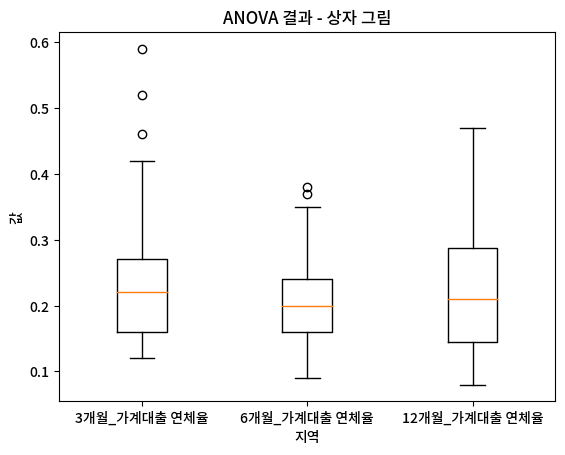

In [ ]:
# 상자 그림 시각화
data = [x1, x2, x3]
labels = ['3개월_가계대출 연체율', '6개월_가계대출 연체율', '12개월_가계대출 연체율']

plt.boxplot(data, labels=labels)
plt.title("ANOVA 결과 - 상자 그림")
plt.xlabel("지역")
plt.ylabel("값")
plt.show()

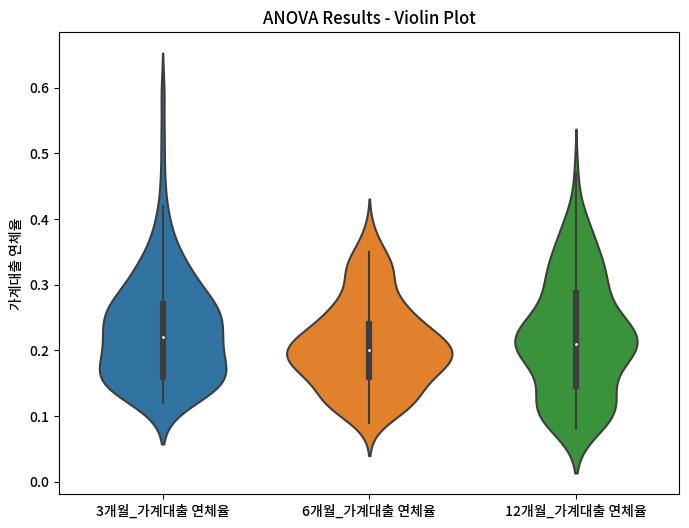

In [ ]:
import seaborn as sns

# 바이올린 플롯 시각화
plt.figure(figsize=(8, 6))
sns.violinplot(data=[x1, x2, x3])
plt.xticks([0, 1, 2], ['3개월_가계대출 연체율', '6개월_가계대출 연체율', '12개월_가계대출 연체율'])
plt.title('ANOVA Results - Violin Plot')
plt.ylabel('가계대출 연체율')
plt.show()

# ANOVA검정 2차 - 독립변수
2차 AVNOVA(분산분석) : 군집화된 3부류의 독립변수들(x)의 차이가 유의미함을 확인

## 지가변동률

In [ ]:
x1 = np.array(anova['3개월_지가변동률'])
x2 = np.array(anova['6개월_지가변동률'])
x3 = np.array(anova['12개월_지가변동률'])

In [ ]:
# ANOVA 검증
from scipy.stats import f_oneway
result = f_oneway(x1, x2, x3)

# 결과 출력
print("ANOVA 결과:")
print("통계량 (F-statistic):", result.statistic)
print("p-value:", result.pvalue)

if result.pvalue < 0.05:
    print("유의미한 차이가 있음")
else:
    print("유의미한 차이가 없음")

ANOVA 결과:
통계량 (F-statistic): 15.004555401982072
p-value: 5.385351167139591e-07
유의미한 차이가 있음


##지가변동률_시각화

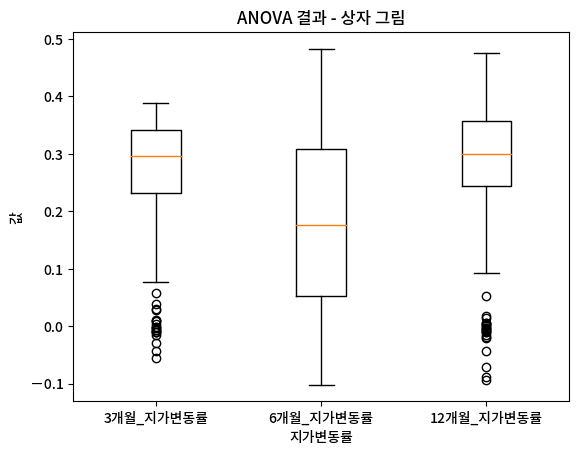

In [ ]:
# 상자 그림 시각화
data = [x1, x2, x3]
labels = ['3개월_지가변동률', '6개월_지가변동률', '12개월_지가변동률']

plt.boxplot(data, labels=labels)
plt.title("ANOVA 결과 - 상자 그림")
plt.xlabel("지가변동률")
plt.ylabel("값")
plt.show()

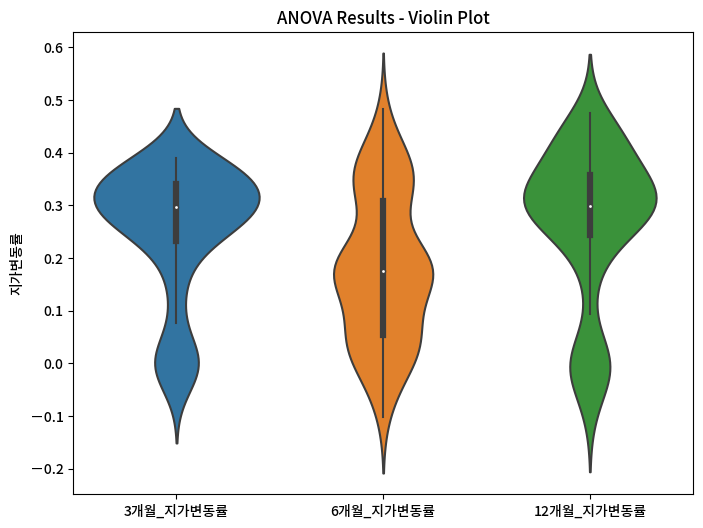

In [ ]:
import seaborn as sns

# 바이올린 플롯 시각화
plt.figure(figsize=(8, 6))
sns.violinplot(data=[x1, x2, x3])
plt.xticks([0, 1, 2], ['3개월_지가변동률', '6개월_지가변동률', '12개월_지가변동률'])
plt.title('ANOVA Results - Violin Plot')
plt.ylabel('지가변동률')
plt.show()

##주택거래량

In [ ]:
x1 = np.array(anova['3개월_주택거래량'])
x2 = np.array(anova['6개월_주택거래량'])
x3 = np.array(anova['12개월_주택거래량'])

In [ ]:
# ANOVA 검증
from scipy.stats import f_oneway
result = f_oneway(x1, x2, x3)

# 결과 출력
print("ANOVA 결과:")
print("통계량 (F-statistic):", result.statistic)
print("p-value:", result.pvalue)

if result.pvalue < 0.05:
    print("유의미한 차이가 있음")
else:
    print("유의미한 차이가 없음")

ANOVA 결과:
통계량 (F-statistic): 21.858323819755274
p-value: 1.0491072928859505e-09
유의미한 차이가 있음


##주택거래량_시각화

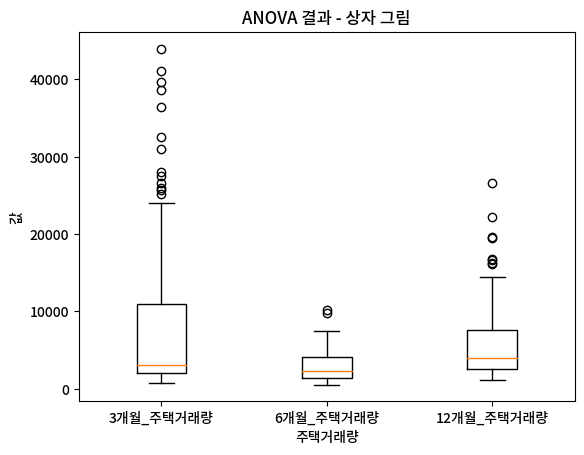

In [ ]:
# 상자 그림 시각화
data = [x1, x2, x3]
labels = ['3개월_주택거래량', '6개월_주택거래량', '12개월_주택거래량']

plt.boxplot(data, labels=labels)
plt.title("ANOVA 결과 - 상자 그림")
plt.xlabel("주택거래량")
plt.ylabel("값")
plt.show()

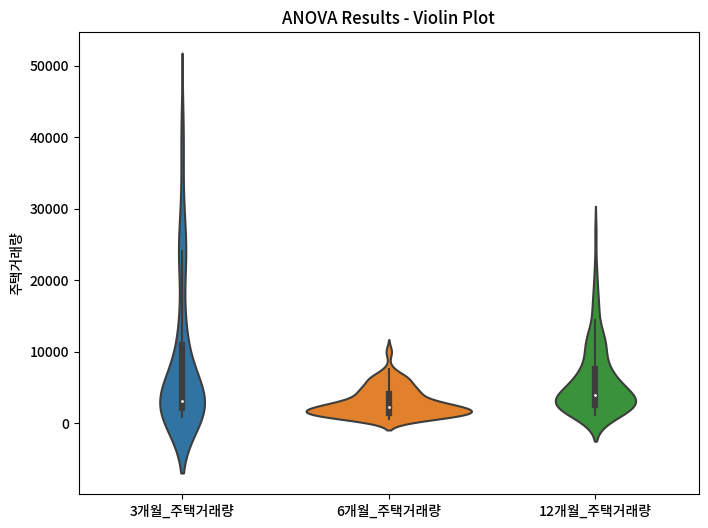

In [ ]:
import seaborn as sns

# 바이올린 플롯 시각화
plt.figure(figsize=(8, 6))
sns.violinplot(data=[x1, x2, x3])
plt.xticks([0, 1, 2], ['3개월_주택거래량', '6개월_주택거래량', '12개월_주택거래량'])
plt.title('ANOVA Results - Violin Plot')
plt.ylabel('주택거래량')
plt.show()

##예금은행 기타 가계대출금

In [ ]:
x1 = np.array(anova['3개월_예금은행 기타 가계대출금'])
x2 = np.array(anova['6개월_예금은행 기타 가계대출금'])
x3 = np.array(anova['12개월_예금은행 기타 가계대출금'])

In [ ]:
# ANOVA 검증
from scipy.stats import f_oneway
result = f_oneway(x1, x2, x3)

# 결과 출력
print("ANOVA 결과:")
print("통계량 (F-statistic):", result.statistic)
print("p-value:", result.pvalue)

if result.pvalue < 0.05:
    print("유의미한 차이가 있음")
else:
    print("유의미한 차이가 없음")

ANOVA 결과:
통계량 (F-statistic): 47.102964485412215
p-value: 5.626108196501558e-19
유의미한 차이가 있음


##예금은행 기타 가계대출금_시각화


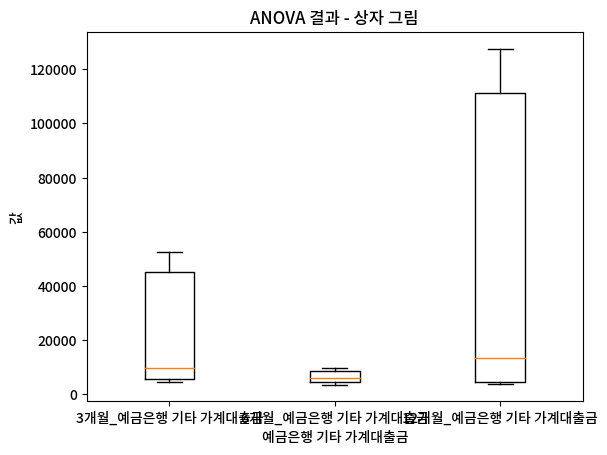

In [ ]:
# 상자 그림 시각화
data = [x1, x2, x3]
labels = ['3개월_예금은행 기타 가계대출금', '6개월_예금은행 기타 가계대출금', '12개월_예금은행 기타 가계대출금']

plt.boxplot(data, labels=labels)
plt.title("ANOVA 결과 - 상자 그림")
plt.xlabel("예금은행 기타 가계대출금")
plt.ylabel("값")
plt.show()

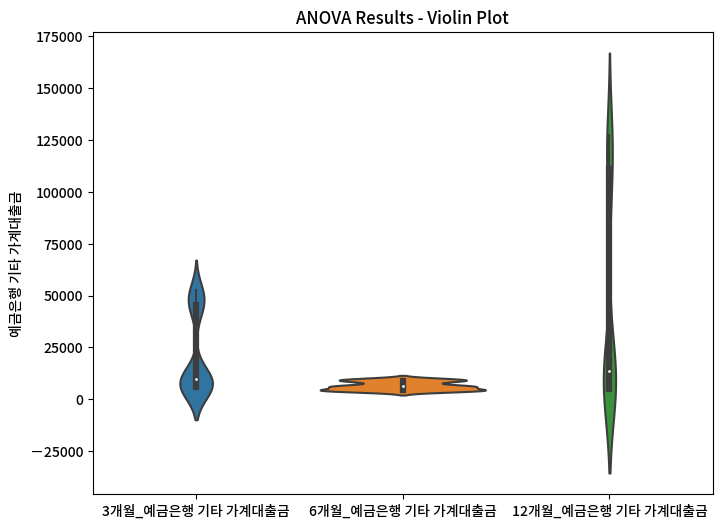

In [ ]:

# 바이올린 플롯 시각화
plt.figure(figsize=(8, 6))
sns.violinplot(data=[x1, x2, x3])
plt.xticks([0, 1, 2], ['3개월_예금은행 기타 가계대출금', '6개월_예금은행 기타 가계대출금', '12개월_예금은행 기타 가계대출금'])
plt.title('ANOVA Results - Violin Plot')
plt.ylabel('예금은행 기타 가계대출금')
plt.show()

## 기준금리(유의미한 차이 없음/ 지역별로 딱히 차이가 없다고 할 수 있음 전국단위로 움직이는 지표임)

In [ ]:
x1 = np.array(anova['3개월_기준금리'])
x2 = np.array(anova['6개월_기준금리'])
x3 = np.array(anova['12개월_기준금리'])

In [ ]:
# ANOVA 검증
from scipy.stats import f_oneway
result = f_oneway(x1, x2, x3)

# 결과 출력
print("ANOVA 결과:")
print("통계량 (F-statistic):", result.statistic)
print("p-value:", result.pvalue)

if result.pvalue < 0.05:
    print("유의미한 차이가 있음")
else:
    print("유의미한 차이가 없음")

ANOVA 결과:
통계량 (F-statistic): 2.5980091585157993e-30
p-value: 1.0
유의미한 차이가 없음


##기준금리_시각화

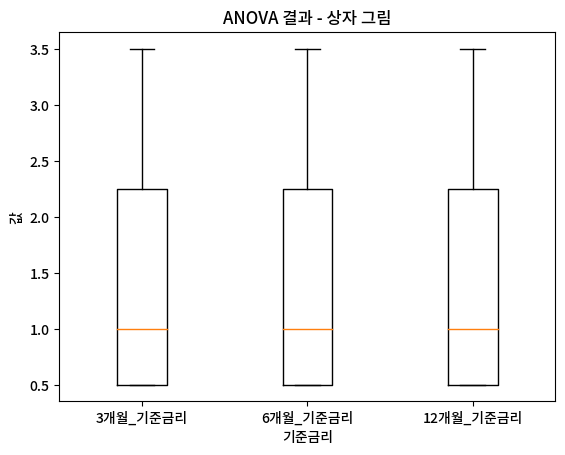

In [ ]:
# 상자 그림 시각화
data = [x1, x2, x3]
labels = ['3개월_기준금리', '6개월_기준금리', '12개월_기준금리']

plt.boxplot(data, labels=labels)
plt.title("ANOVA 결과 - 상자 그림")
plt.xlabel("기준금리")
plt.ylabel("값")
plt.show()